<a href="https://colab.research.google.com/github/Jojo31100/Projet_7-Air_Paradis-PUBLIC/blob/main/AirParadis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet n°7 - Air Paradis : réalisez une analyse de sentiments grâce au Deep Learning**

[Lien vers le projet et les attendus](https://openclassrooms.com/fr/paths/795/projects/1516/)

**Comment allez-vous procéder ?**

Cette mission suit un scénario de projet professionnel.

Vous pouvez suivre les étapes pour vous aider à réaliser vos livrables.

Avant de démarrer, nous vous conseillons de :

- lire toute la mission et ses documents liés ;
- prendre des notes sur ce que vous avez compris ;
- consulter les étapes pour vous guider ;
- préparer une liste de questions pour votre première session de mentorat.

---

**Prêt à mener la mission ?**

Vous êtes ingénieur IA chez MIC (Marketing Intelligence Consulting), une entreprise de conseil spécialisée sur les problématiques de marketing digital.

Dans deux semaines, vous avez rendez-vous avec Mme Aline, directrice marketing de la compagnie aérienne “Air Paradis”.

Air Paradis a missionné votre cabinet pour créer un produit IA permettant d'anticiper les bad buzz sur les réseaux sociaux.

Il est vrai que “Air Paradis” n'a pas toujours bonne presse sur les réseaux...

En sortant d'un rendez-vous de cadrage avec les équipes de Air Paradis, vous avez noté les éléments suivants :

- Air Paradis veut un prototype d'un produit IA permettant de prédire le sentiment associé à un tweet.

- Données : pas de données clients chez Air Paradis. Solution : utiliser des [données Open Source](https://www.kaggle.com/kazanova/sentiment140) - ou en téléchargement direct à [ce lien](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+7%C2%A0-+D%C3%A9tectez+les+Bad+Buzz+gr%C3%A2ce+au+Deep+Learning/sentiment140.zip)
 - Description des données : des informations sur les tweets (utilisateur ayant posté, contenu, moment du post) et un label binaire (tweet exprimant un sentiment négatif ou non).

- TO-DO :
 - Préparer un prototype fonctionnel du modèle. Le modèle est exposé via une API déployée sur le Cloud, appelée par une interface locale(notebook ou application Streamlit) qui envoie un tweet à l'API et récupère la prédiction de sentiment.
 - Préparer un support de présentation explicitant les méthodologies utilisées pour les différentes approches (attention : audience non technique).

---

Après avoir reçu votre compte-rendu, Marc, votre manager, vous a contacté pour, selon ses mots, “faire d'une pierre deux coups”.

**De :** *Marc*

**Envoyé :** *hier 17:14*

**À :** *vous*

**Objet :** *Air Paradis : complément*

Salut

Merci pour ton récap du meeting avec Air Paradis. J'ai l'impression que ça s'est bien passé !

Je me disais... Puisque tu vas faire un proto pour ce client, j'ai l'intuition que ce produit pourrait se généraliser à d'autres cas d'usage.

Tu voudrais bien en profiter pour tester plusieurs approches ?

- approche “Modèle sur mesure simple”, pour développer rapidement un modèle classique (ex : régression logistique) permettant de prédire le sentiment associé à un tweet.
- approche “Modèle sur mesure avancé” pour développer un modèle basé sur des réseaux de neurones profonds pour prédire le sentiment associé à un tweet. => C'est ce modèle que tu devras déployer et montrer à Air Paradis.

Pour cette 2ème approche, tu penseras bien à essayer au moins deux word embeddings différents et à garder celui qui permet d'obtenir les meilleures performances. En complément, pourrais-tu également regarder l'apport en performance d'un modèle BERT ? Cela nous permettra de voir si nous devons investir dans ce type de modèle.

Et en même ce serait top si tu pouvais mettre en oeuvre un bon exemple de démarche orientée MLOps, tu sais c'est la nouvelle priorité de notre directeur !

J'aimerais que tu puisses démontrer à l'occasion de l'élaboration de ton prototype tout l'apport du MLOps, afin d'assurer une diffusion aux autres équipes :

- d'abord réaliser une présentation synthétique des principes du MLOps et ses apports,
- ensuite utiliser l'outil MLFlow, future référence pour notre société, pour assurer la gestion des expérimentations des modèles : tracking et reporting de l'entraînement des modèles, centralisation du stockage des modèles, et test du serving proposé par MLFlow,
- mettre en oeuvre un pipeline de déploiement continu du modèle que tu auras choisi via une API (Git + Github + plateforme Cloud au choix), qui intègre également des tests unitaires automatisés,
- et enfin initier un suivi de la performance du modèle en production. Pour cela tu utiliseras un service Azure Application Insight que tu auras créé pour l‘occasion :
 - Pour remonter des traces des tweets qui seraient considérés par l'utilisateur comme mal prédits : le texte du tweet et la prédiction.
 - Pour déclencher une alerte (envoi SMS ou mail) dans le cas d'un nombre trop important de tweet mal prédits (par exemple 3 tweets mal prédits en l'espace de 5 minutes).
 - Présenter une démarche qui pourrait être mise en oeuvre pour l'analyse de ces statistiques et l'amélioration du modèle dans le temps.

Nous souhaitons limiter les coûts de mise en production de ce prototype, donc peux-tu privilégier une solution gratuite Cloud pour le déploiement de l'API de prédiction, par exemple Azure webapp (ASP F1 gratuit), PythonAnywhere, Heroku avec le package “student” de Github ou tout autre solution ?

Si le modèle avancé est trop lourd et induit un dépassement des limites de taille des solutions gratuites, tu pourras tester le déploiement avec le modèle classique, ou bien utiliser des techniques de réduction de taille de ton modèle TensorFlow-Keras via une conversion en TensorFlow Lite.

Merci d'avance !

*Marc*

PS : Ah au fait, tant que tu y es, tu pourras rédiger un petit article pour le blog à partir de ton travail de modélisation et de ta démarche orientée MLOps ?

---

Vous avez pris connaissance du mail, vous avez hâte de démarrer ce nouveau projet avec intérêt ! C'est parti !

# Initialisation : chargement des bibliothèques Python et des fonctions globales

In [1]:
!pip install gensim

In [2]:
from google.colab import drive
import pandas
import numpy
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot
import seaborn
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, auc, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from IPython.display import clear_output
import tensorflow
import tensorflow_hub
from gensim.models import Word2Vec, FastText
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, BatchNormalization, Dense, Dropout
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import joblib
import os
import pickle
from transformers import TFBertForSequenceClassification, create_optimizer
from transformers import BertTokenizer, BertTokenizerFast
from sentence_transformers import SentenceTransformer

In [4]:
#############################################
## DATAFRAME MAIN INFORMATIONS AT A GLANCE ##
#############################################
def _visualisationDataset(_inputDataframe, _pourcentageRemplissageTarget, _legendesGraph="No"):
    nbDonneesPresentesGlobal = 0
    tailleDataframe = _inputDataframe.shape[0]
    for index in _inputDataframe.columns:
        nbIndividus = _inputDataframe[index].notna().sum()
        nbNaN = _inputDataframe[index].isna().sum()
        typeDonnee = _inputDataframe[index].dtype
        pourcentageRemplissage = round((nbIndividus / tailleDataframe) * 100, 2)

        if (pourcentageRemplissage >= _pourcentageRemplissageTarget):
            ligne = f"[>\033[32m{_pourcentageRemplissageTarget}%\033[0m] "
            ligne += f"Variable : \033[1m\033[3m{index:<50}\033[0m"
            ligne += f"Remplissage : \033[32m\033[1m{str(pourcentageRemplissage).rjust(5)} %\033[0m"
        else:
            ligne = f"[<\033[31m{_pourcentageRemplissageTarget}%\033[0m] "
            ligne += f"Variable : \033[1m\033[3m{index:<50}\033[0m"
            ligne += f"Remplissage : \033[31m\033[1m{str(pourcentageRemplissage).rjust(5)} %\033[0m"
        ligne += f" (\033[3m{str(nbIndividus).rjust(5)}\033[0m individus/\033[3m{tailleDataframe}\033[0m)"
        ligne += f"\tNaN : \033[1m{str(nbNaN).rjust(5)}\033[0m"
        ligne += f"\tType : \033[3m{str(typeDonnee):<5}\033[0m"
        if (typeDonnee == "object"):
            nbUniques = _inputDataframe[index].nunique()
            ligne += f"\t(Individus uniques : \033[1m{nbUniques}\033[0m)"
        elif (typeDonnee == "bool"):
            ligne += f"\t(\"0\" vs. \"1\" = \033[1m{_inputDataframe[index].value_counts().get(True, 0)}\033[0m vs. \033[1m{_inputDataframe[index].value_counts().get(False, 0)}\033[0m)"
        elif (typeDonnee == "datetime64[ns]"):
            ligne += f" -- TIME STAMP !"
        else:
            min = round(_inputDataframe[index].min(), 2)
            max = round(_inputDataframe[index].max(), 2)
            moyenne = round(_inputDataframe[index].mean(), 2)
            ligne += f"\t(Min = \033[1m{min:<5}\033[0m Max = \033[1m{max:<5}\033[0m Moyenne = \033[1m{moyenne}\033[0m)"
        print(ligne)
        nbDonneesPresentesGlobal = nbDonneesPresentesGlobal + nbIndividus

    print("\nAu global ", nbDonneesPresentesGlobal, " données sont présentes, sur un total de ", _inputDataframe.shape[0]*_inputDataframe.shape[1], ", soit un remplissage de ", round( ((nbDonneesPresentesGlobal*100)/(_inputDataframe.shape[0]*_inputDataframe.shape[1])), 2),"%", sep="")
    print(_inputDataframe.dropna().shape[0], " individus ne comptent aucun \"NaN\"", sep="")
    print("Taille du dataset : ", _inputDataframe.shape[0], " individus, et ", _inputDataframe.shape[1], " variables\n\n", sep="")

    dataframeRepartitionTest = _inputDataframe.count()*100/_inputDataframe.shape[0]
    matplotlib.pyplot.figure(figsize=(20, 5))
    matplotlib.pyplot.title("Représentation graphique de répartition du contenu du dataset")
    matplotlib.pyplot.xlabel("Variables")
    matplotlib.pyplot.ylabel("Pourcentage de remplissage")
    matplotlib.pyplot.bar(dataframeRepartitionTest.index, dataframeRepartitionTest.values, color="skyblue", edgecolor="black")
    matplotlib.pyplot.axhline(y=25, color="yellow", linestyle="--", linewidth=2)
    matplotlib.pyplot.axhline(y=33, color="orange", linestyle="--", linewidth=2)
    matplotlib.pyplot.axhline(y=50, color="red", linestyle="-", linewidth=2)
    matplotlib.pyplot.axhline(y=66, color="orange", linestyle="--", linewidth=2)
    matplotlib.pyplot.axhline(y=75, color="yellow", linestyle="--", linewidth=2)
    if (_legendesGraph == "No"):
        matplotlib.pyplot.xticks([])
    else:
        matplotlib.pyplot.xticks(rotation=80)
        matplotlib.pyplot.xlim(-0.5, _inputDataframe.shape[1] - 0.5)
        matplotlib.pyplot.show()

#Rouge        : \033[31m
#Vert         : \033[32m
#Jaune        : \033[33m
#Bleu         : \033[34m
#Cyan         : \033[36m
#Gras         : \033[1m
#Italique     : \033[3m
#Réinit style : \033[0m


#Fonction de nettoyage de texte pour du Deep Learning : 1)Passage en minuscule / 2)Tokenisation / 3)Suppression des tokens de moins de X caractères / 4)Suppression des tokens trouvés plus de X fois / 5)Suppression des StopWords NLTK / 6) Lemmatisation ou Racinisation (ou rien du tout)
#
#INPUT :
########
#    _inputDataframe                      : dataframe Pandas source
#    _inputFeaturesNames                  : Nom de la variable contenant des données textuelles à traiter
#    _inputDropTokenIfLessThanXChars      : Nombre de caractère minimum pour un token (tous les tokens de moins de "_inputDropTokenIfLessThanXChars" caractères, seront supprimés)
#                                                                               Si "_inputDropTokenIfLessThanXChars" = 0 --> On passe
#    _inputDropTokenIfFoundMoreThanXTimes : Nombre d'occurence maximum d'un token (tous les tokens présents plus de "_inputDropTokenIfFoundMoreThanXTimes" fois, seront supprimés)
#                                                                               Si "_inputDropTokenIfFoundMoreThanXTimes" = 0 --> On passe
#    _inputLanguage                       : Langue dans laquelle on va télécharger le StopWords NLTK les plus courants (comme "english", par exemple)
#                                                                               Si "None", alors on passe sans supprimer les StopWords (utile en DeepLearning)
#    _inputLemmatizationOrStemmingChoice  : Choix du traitement des tokens : soit on procède à une "Lemmatisation" (_inputLemmatizationOrStemmingChoice="LEM"),
#                                                                            soit à une "Racinisation" (_inputLemmatizationOrStemmingChoice="STEM"),
#                                                                            soit ne RIEN FAIRE de plus (_inputLemmatizationOrStemmingChoice="NONE")
#
#OUTPUT :
#########
#    Les tokens (qui ont été traités)
#
def _textCleaning(_inputDataframe, _inputFeaturesNames, _inputDropTokenIfLessThanXChars=0, _inputDropTokenIfFoundMoreThanXTimes=0, _inputLanguage="None", _inputLemmatizationOrStemmingChoice="None"):
    #On va créer une copie pour ne pas modifier le DataFrame original
    tempDataframe = _inputDataframe.copy()

    #1ère étape : on passe tous les caractères en minuscules et on vire les caractères spéciaux !
    tempDataframe["tokens"] = tempDataframe[_inputFeaturesNames].astype(str).str.lower().fillna("")
    tempDataframe["tokens"] = tempDataframe["tokens"].str.replace("-", " ").str.replace("+", " ").str.replace("/", " ").str.replace("#", " ").str.replace("_", " ").str.replace("&", " ").str.replace("(", " ").str.replace(")", " ").str.replace("@", " ")

    #2ème étape : on ne garde que les mots constitués de caracètres alphabétiques (Tokenisation)
    tokenizer = nltk.RegexpTokenizer(r"[^\W\d_]+")
    tempDataframe["tokens"] = tempDataframe["tokens"].apply(tokenizer.tokenize)

    #3ème étape : on vire les tokens de moins de "_inputDropTokenIfLessThanXChars" caractères
    if(_inputDropTokenIfLessThanXChars != 0):
        tempDataframe["tokens"] = tempDataframe["tokens"].apply(lambda tokens: [token for token in tokens if len(token) >= _inputDropTokenIfLessThanXChars])
    else:
        pass

    #4ème étape : on virer les X tokens les plus fréquents
    if(_inputDropTokenIfFoundMoreThanXTimes != 0):
        #On met à plat toutes les listes de tokens en une seule grande liste
        flattenTokens = [token for sublist in tempDataframe["tokens"] for token in sublist]
        #On compte les occurrences de chaque token
        numberOfTokens = Counter(flattenTokens)
        #On filtrer les tokens qui apparaissent X fois ou plus
        filteredTokensList = [item for item in numberOfTokens.most_common() if item[1] >= _inputDropTokenIfFoundMoreThanXTimes]
        mostCommonTokens = Counter(dict(filteredTokensList))
        #DEBUG - DECOMMENTER CETTE LIGNE POUR AFFICHER LA LISTE DES TOKENS LES PLUS COURANTS
        #display(mostCommonTokens)
        #On converti les clés des tokens les plus courants en un ensemble
        stopWords = set(mostCommonTokens.keys())
        #On applique la suppression des StopWords à chaque liste de tokens dans la variable "tokens"
        tempDataframe["tokens"] = tempDataframe["tokens"].apply(lambda tokens: [token for token in tokens if token not in stopWords])
    else:
        pass

    #5ème étape : on télécharge les StopWords NLTK les plus courants de la langue "_inputLanguage", ou on passe si "_inputLanguage" == "None"
    if(str(_inputLanguage).lower() != "none"):
        nltk.download("stopwords")
        stopWords = set(stopwords.words(_inputLanguage))
        #On applique la suppression des StopWords à chaque liste de tokens dans la variable "tokens"
        tempDataframe["tokens"] = tempDataframe["tokens"].apply(lambda tokens: [token for token in tokens if token not in stopWords])
    else:
        pass

    #6ème étape : on lemmatise ("Lem") ou on racinise ("Stem") les tokens, ou on ne fait rien du tout ("None")
    if(str(_inputLemmatizationOrStemmingChoice).lower() == "lem"):
        nltk.download("wordnet")
        print("***Lemmatization***")
        lemmatizer = WordNetLemmatizer()
        tempDataframe["tokens"] = tempDataframe["tokens"].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])
    elif(str(_inputLemmatizationOrStemmingChoice).lower() == "stem"):
        nltk.download("wordnet")
        print("***Stemming***")
        stemmer = PorterStemmer()
        tempDataframe["tokens"] = tempDataframe["tokens"].apply(lambda tokens: [stemmer.stem(token) for token in tokens])
    else:
        pass

    #Display post-cleaning informations
    flattenTokensList = [token for sublist in tempDataframe["tokens"] for token in sublist]
    print("Nombre total de tokens\t\t:", len(flattenTokensList))
    print("Nombre de tokens uniques\t:", len(Counter(flattenTokensList)))

    return tempDataframe["tokens"]


#Fonction d'affichage de métriques (Accuracy, ROC AUC, Rapport de classification, Matrice de confusion, Courbes ROC)
#
#INPUT :
#    _inputPositiveLabel : Label de la valeur positive (rien = "1")
#
########
#
#OUTPUT :
#########
#
def _metriques(_inputPositiveLabel=4):
    #Accuracy
    print("Accuracy\t:", accuracy_score(y_test, y_pred))

    #ROC AUC score
    print("\nROC AUC score\t:", roc_auc_score(y_test, y_proba))

    #Rapport de classification
    print("\nRapport de classification :\n", classification_report(y_test, y_pred, target_names=["Négatif", "Positif"]), sep="")

    #Matrice de confusion
    matriceDeConfusion = confusion_matrix(y_test, y_pred)
    seaborn.heatmap(matriceDeConfusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Négatif", "Positif"], yticklabels=["Négatif", "Positif"])
    matplotlib.pyplot.title("Matrice de confusion")
    matplotlib.pyplot.xlabel("Prédit")
    matplotlib.pyplot.ylabel("Réel")
    matplotlib.pyplot.show()

    #Courbe ROC
    fauxPositifs, vraisPositifs, thresholds = roc_curve(y_test, y_proba, pos_label=_inputPositiveLabel)
    roc_auc = auc(fauxPositifs, vraisPositifs)
    matplotlib.pyplot.figure()
    matplotlib.pyplot.plot(fauxPositifs, vraisPositifs, color="darkorange", lw=2, label=f"Courbes ROC (AUC = {roc_auc:.4f})")
    matplotlib.pyplot.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    matplotlib.pyplot.xlim([-0.01, 1.01])
    matplotlib.pyplot.ylim([-0.01, 1.01])
    matplotlib.pyplot.xlabel("Taux de Faux Positifs")
    matplotlib.pyplot.ylabel("Taux de Vrais Positifs")
    matplotlib.pyplot.title("Courbes ROC")
    matplotlib.pyplot.legend(loc="lower right")
    matplotlib.pyplot.grid(True)
    matplotlib.pyplot.show()


#Fonction d'enregistrement des métriques dans MLflow (Accuracy, ROC AUC, Rapport de classification, Matrice de confusion, Courbes ROC)
#
#INPUT :
########
#    _inputPhase          : phase à enregistrer "train", "validation" ou "test"
#    _input_y_train       : target
#    _input_y_train_pred  : target prédite
#    _input_y_train_proba : probabilité de la target prédite
#
#OUTPUT :
#########
#
def _metriquesMLflow(_inputPhase, _input_y_train, _input_y_train_pred, _input_y_train_proba):
    mlflow.log_metric(_inputPhase+"_accuracy_score", accuracy_score(_input_y_train, _input_y_train_pred))
    mlflow.log_metric(_inputPhase+"_f1_score", f1_score(_input_y_train, _input_y_train_pred))
    mlflow.log_metric(_inputPhase+"_precision_score", precision_score(_input_y_train, _input_y_train_pred))
    mlflow.log_metric(_inputPhase+"_recall_score", recall_score(_input_y_train, _input_y_train_pred))
    mlflow.log_metric(_inputPhase+"_roc_auc", roc_auc_score(_input_y_train, _input_y_train_proba))
    print("Enregistrement des métriques de la phase \"", _inputPhase, "\"\n\n", sep="")


#Fonction de rechargement, depuis MLflow, du Modèle/Pipeline SciKit Learn (enregistré manuellement)
#
#INPUT :
########
#    _inputPipelineName : Nom du Pipeline (trouvé dans les "attributes" d'un best_run)
#    _inputModelVersion : Version du modèle à charger
#
#OUTPUT :
#########
#    Le Modèle/Pipeline
#
def _chargeModeleSKLearnMLflow(_inputModelName, _inputModelVersion="1"):
    #Connexion à Google Drive
    drive.mount("/content/drive/")

    #Configure l'URI de MLflow pour enregistrer ses infos (experiments, runs, models, metrics...) dans Google Drive
    mlflow.set_tracking_uri("file:///content/drive/My Drive/Colab_Notebooks/Project_7/MLflow_data/")

    #Chargement du modèle
    _model = mlflow.sklearn.load_model("models:/"+_inputModelName+"/"+_inputModelVersion)
    clear_output(wait=True) #Evite la corruption du notebook quand il sera remonté dans GitHub !

    display(_model)
    return _model

# Partie 1 : installation du pipeline

On part du principe qu'on va utiliser Google Colab pour le développement, tout en liant le compte avec GitHub, dans lequel on a créé un repository public nommé ["Projet_7-Air_Paradis-PUBLIC"](https://github.com/Jojo31100/Projet_7-Air_Paradis-PUBLIC)


## 1.1 MLflow + ngrok

In [6]:
!pip install mlflow
!pip install pyngrok

In [8]:
import mlflow
from mlflow.tracking import MlflowClient
from pyngrok import ngrok
import time
import urllib.parse #Pour gérer l'encodage des chemins


#Nettoyage avant de commencer
!kill $(lsof -t -i:5000 || lsof -t -i:5001) 2>/dev/null
ngrok.kill()

#Etape 1 : connexion à Google Drive
drive.mount("/content/drive/")

#Etape 2 : définition et création du dossier MLflow sur Google Drive
baseMLflowPath = "Colab_Notebooks/Project_7/MLflow_data"
fullGoogleColabPath = os.path.join("/content/drive/My Drive", baseMLflowPath)

#Etape 3 : création du dossier s'il n'existe pas
os.makedirs(fullGoogleColabPath, exist_ok=True)
print(f"Dossier MLflow à l'emplacement : {fullGoogleColabPath}")

#Etape 4 : configuration de l'URI
mlflow.set_tracking_uri(f"file://{fullGoogleColabPath}")
print("MLflow Python tracking URI défini sur :", mlflow.get_tracking_uri())

#Etape 5 : nettoyage ngrok et configuration du token
ngrokAuthToken = "30GdRuK989WiPWr5DbDm7Zv23eF_7j5moxUiutbaNa85GnjUP"
ngrok.set_auth_token(ngrokAuthToken)

#Etape 6 : lancement de l'interface utilisateur de MLflow avec ngrok
backendUriForUiCommand = f'"{fullGoogleColabPath}"'
print("Lancement de MLflow UI avec --backend-store-uri :", backendUriForUiCommand)

#Etape 7 : lancement de l'UI MLflow en arrière-plan
get_ipython().system_raw(f"mlflow ui --backend-store-uri {backendUriForUiCommand} --port 5000 &")

#Etape 8 : attendre que l'UI MLflow démarre
print("\nDémarrage de l'interface utilisateur de MLflow et chargement des fichiers de données...\nMerci de patienter une 30aine de secondes...")
time.sleep(30)

#Etape 9 : création du tunnel Ngrok
try:
    ngrokTunnel = ngrok.connect(addr="5000", proto="http")
    print("\n\nPour accéder à l'UI de MLflow, cliquez ici :", ngrokTunnel.public_url, "\n---> Sur le prochain écran, cliquez sur le bouton [Visit Site] ! ;)\n")
except Exception as error:
    print("Erreur lors de la création du tunnel ngrok :", error)
    print("Veuillez vérifier que ngrok est correctement installé, authentifié, et que MLflow UI est bien en cours d'exécution...")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Dossier MLflow à l'emplacement : /content/drive/My Drive/Colab_Notebooks/Project_7/MLflow_data
MLflow Python tracking URI défini sur : file:///content/drive/My Drive/Colab_Notebooks/Project_7/MLflow_data
Lancement de MLflow UI avec --backend-store-uri : "/content/drive/My Drive/Colab_Notebooks/Project_7/MLflow_data"

Démarrage de l'interface utilisateur de MLflow et chargement des fichiers de données...
Merci de patienter une 30aine de secondes...


Pour accéder à l'UI de MLflow, cliquez ici : https://55ff84111dce.ngrok-free.app 
---> Sur le prochain écran, cliquez sur le bouton [Visit Site] ! ;)



# Partie 2 : analyse Exploratoire des Données

In [ ]:
#Connexion à Google Drive
drive.mount("/content/drive/")

#Comme le dataset fourni ne contient pas la 1ère ligne avec les noms des variables, on va préparer le dataframe Pandas manuellement, en les rajoutants
nomsVariables = ["target", "ids", "date", "flag", "user", "text"] #Informations trouvées ici : https://www.kaggle.com/datasets/kazanova/sentiment140

#On charge nos données
dataframe = pandas.read_csv("/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/training.1600000.processed.noemoticon.csv", encoding="latin-1", header=None, names=nomsVariables)
dataframe.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(1600000, 6)

[>100%] Variable : target                                            Remplissage : 100.0 % (1600000 individus/1600000)	NaN :     0	Type : int64	(Min = 0     Max = 4     Moyenne = 2.0)
[>100%] Variable : ids                                               Remplissage : 100.0 % (1600000 individus/1600000)	NaN :     0	Type : int64	(Min = 1467810369 Max = 2329205794 Moyenne = 1998817552.3)
[>100%] Variable : date                                              Remplissage : 100.0 % (1600000 individus/1600000)	NaN :     0	Type : object	(Individus uniques : 774363)
[>100%] Variable : flag                                              Remplissage : 100.0 % (1600000 individus/1600000)	NaN :     0	Type : object	(Individus uniques : 1)
[>100%] Variable : user                                              Remplissage : 100.0 % (1600000 individus/1600000)	NaN :     0	Type : object	(Individus uniques : 659775)
[>100%] Variable : text                                              Remplissage : 100.0 % (1600

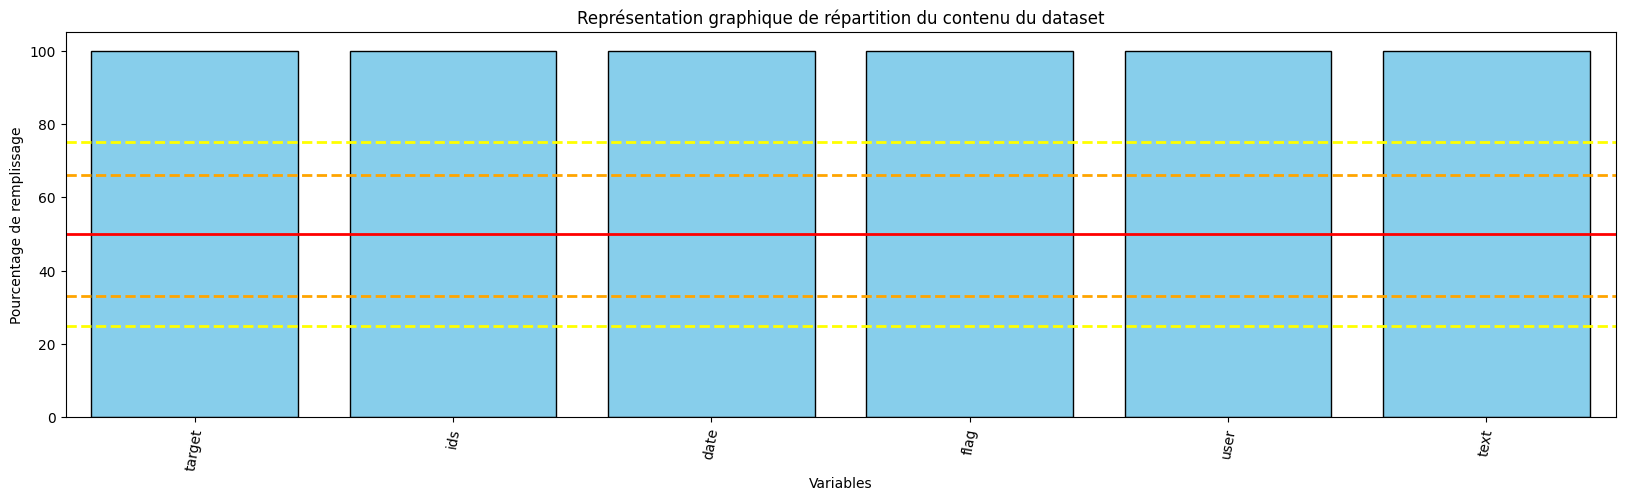

In [ ]:
_visualisationDataset(dataframe, 100, "Yes")

D'emblée, on constate déjà beaucoup de choses :
1. Les variables "ids", "date", "flag", "user" ne nous serviront sans doute pas à grand chose...
2. La base est énorme :  1,6 millions de tweets
3. La variable target semble équilibrée (valeur min=0 / valeur max=4 / moyenne=2 ; Ce qui signifie qu'il y a autant de 0 que de 4 !)
4. La variable "flag" ne sera, pour sûr, d'absolument AUCUNE utilité (1 seule valeur sur l'ensemble du dataset !)

Donc, les variables intéressantes seront :
- "target" (la target à prédire : 0=Tweet négatif / 4=Tweet positif)
- "text" (les données d'entraînement/validation/test)

# Partie 3 : construction de datasets pour l'entrainement/la validation et le test de nos modèles

Entraîner la totalité de nos modèles sur les 1,6 millions de tweets paraît chronophage et pas forcément utile.

On va donc faire un sous-échantillon (équivalent à 5% du dataset de base), de 80 000 tweets.

Ce qui devrait être amplement suffisant pour entrainer/valider et tester nos différents modèles (avant de sélectionner le meilleur modèle et de le tester sur l'entièreté du dataset.

Il sera important toutefois de procéder à un mélange aléatoire (mais reproductible) des données : la target étant négative sur les 50 premiers pourcents du dataset, et positive sur les 50% restants.

In [ ]:
#Sous-échantillonnage de 80 000 individus (5% des 1,6 million de Tweets), stratifié sur la variable "target"
subDataframe_TrainVal, subDataframe_Test = train_test_split(dataframe, train_size=80000, stratify=dataframe["target"], random_state=23011977)

[>100%] Variable : target                                            Remplissage : 100.0 % (80000 individus/80000)	NaN :     0	Type : int64	(Min = 0     Max = 4     Moyenne = 2.0)
[>100%] Variable : ids                                               Remplissage : 100.0 % (80000 individus/80000)	NaN :     0	Type : int64	(Min = 1467811795 Max = 2329205473 Moyenne = 1999450012.97)
[>100%] Variable : date                                              Remplissage : 100.0 % (80000 individus/80000)	NaN :     0	Type : object	(Individus uniques : 75759)
[>100%] Variable : flag                                              Remplissage : 100.0 % (80000 individus/80000)	NaN :     0	Type : object	(Individus uniques : 1)
[>100%] Variable : user                                              Remplissage : 100.0 % (80000 individus/80000)	NaN :     0	Type : object	(Individus uniques : 68063)
[>100%] Variable : text                                              Remplissage : 100.0 % (80000 individus/80000)	Na

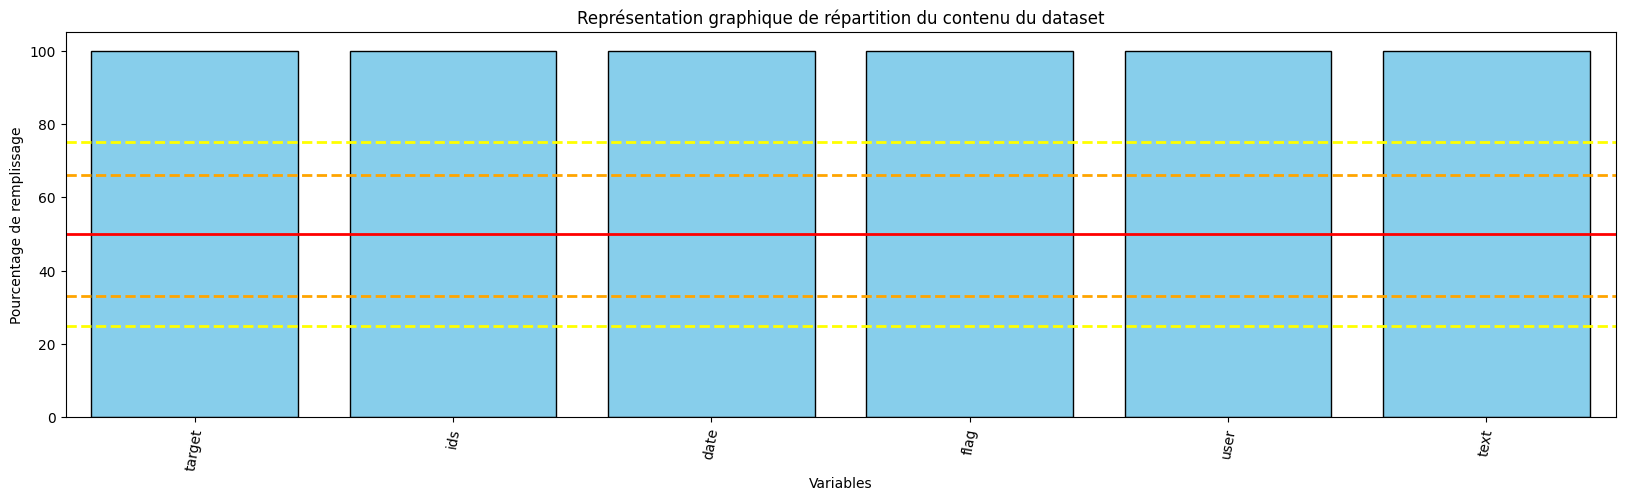

In [ ]:
_visualisationDataset(subDataframe_TrainVal, 100, "Yes")

[>100%] Variable : target                                            Remplissage : 100.0 % (1520000 individus/1520000)	NaN :     0	Type : int64	(Min = 0     Max = 4     Moyenne = 2.0)
[>100%] Variable : ids                                               Remplissage : 100.0 % (1520000 individus/1520000)	NaN :     0	Type : int64	(Min = 1467810369 Max = 2329205794 Moyenne = 1998784264.89)
[>100%] Variable : date                                              Remplissage : 100.0 % (1520000 individus/1520000)	NaN :     0	Type : object	(Individus uniques : 753794)
[>100%] Variable : flag                                              Remplissage : 100.0 % (1520000 individus/1520000)	NaN :     0	Type : object	(Individus uniques : 1)
[>100%] Variable : user                                              Remplissage : 100.0 % (1520000 individus/1520000)	NaN :     0	Type : object	(Individus uniques : 639632)
[>100%] Variable : text                                              Remplissage : 100.0 % (152

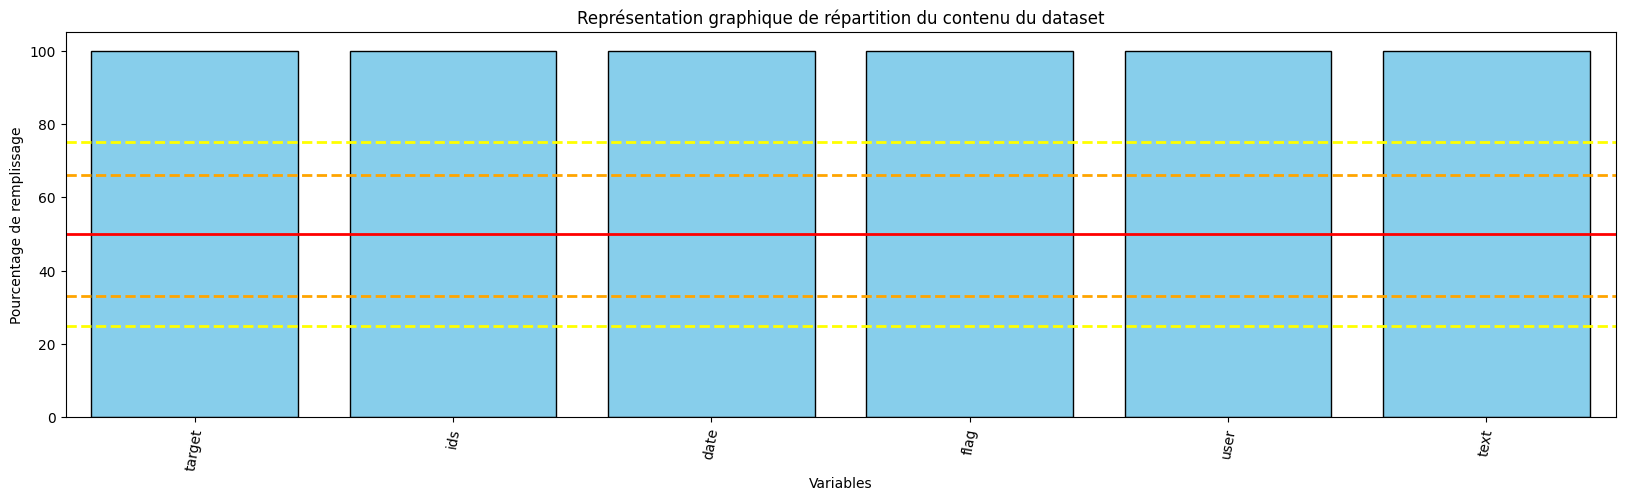

In [ ]:
_visualisationDataset(subDataframe_Test, 100, "Yes")

# Partie 4 : pré-traitement du texte

In [ ]:
#Sur le dataframe d'entraînement et de validation
#On passe le texte dans la fonction de nettoyage/tokensisation/lemmatisation pour le Bag of Words ou l'Embedding
print("\nTraitement textuel : Bag of Words/Embedding + Lemmatisation")
subDataframe_TrainVal["Bag_of_Words_Lemmatise"] = _textCleaning(subDataframe_TrainVal, "text", 0, 0, "english", "Lem") #Pour l'instant, on ne supprime pas les mots de moins de X caractères ou présent plus de X fois (on reviendra adapter si nécessaire)
subDataframe_TrainVal["Bag_of_Words_Lemmatise"] = subDataframe_TrainVal["Bag_of_Words_Lemmatise"].apply(lambda tokens: " ".join(tokens))

#On passe le texte dans la fonction de nettoyage/tokensisation/racinisation pour le Bag of Words ou l'Embedding
print("\nTraitement textuel : Bag of Words/Embedding + Racinisation")
subDataframe_TrainVal["Bag_of_Words_Racinise"] = _textCleaning(subDataframe_TrainVal, "text", 0, 0, "english", "Stem") #Pour l'instant, on ne supprime pas les mots de moins de X caractères ou présent plus de X fois (on reviendra adapter si nécessaire)
subDataframe_TrainVal["Bag_of_Words_Racinise"] = subDataframe_TrainVal["Bag_of_Words_Racinise"].apply(lambda tokens: " ".join(tokens))

#On passe le texte dans la fonction de nettoyage/tokensisation pour le Deep Learning
print("\nTraitement textuel : Deep Learning")
subDataframe_TrainVal["Texte_DeepLearning"] = _textCleaning(subDataframe_TrainVal, "text", 0, 0, "None", "None") #Pour l'instant, on ne supprime pas les mots de moins de X caractères ou présent plus de X fois (on reviendra adapter si nécessaire)
subDataframe_TrainVal["Texte_DeepLearning"] = subDataframe_TrainVal["Texte_DeepLearning"].apply(lambda tokens: " ".join(tokens))


Traitement textuel : Bag of Words/Embedding + Lemmatisation


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


***Lemmatization***
Nombre total de tokens		: 619597
Nombre de tokens uniques	: 73104

Traitement textuel : Bag of Words/Embedding + Racinisation


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


***Stemming***
Nombre total de tokens		: 619597
Nombre de tokens uniques	: 66803

Traitement textuel : Deep Learning
Nombre total de tokens		: 1098824
Nombre de tokens uniques	: 76676


In [ ]:
subDataframe_TrainVal

,target,ids,date,flag,user,text,Bag_of_Words_Lemmatise,Bag_of_Words_Racinise,Texte_DeepLearning
711192,0,2258146124,Sat Jun 20 15:27:32 PDT 2009,NO_QUERY,duckiedinkis,mourning the loss of my macbook,mourning loss macbook,mourn loss macbook,mourning the loss of my macbook
805926,4,1468740719,Tue Apr 07 03:28:42 PDT 2009,NO_QUERY,yippeekid,@aplusk i'm not well just wanna say hi!!!!,aplusk well wanna say hi,aplusk well wanna say hi,aplusk i m not well just wanna say hi
914827,4,1752964004,Sat May 09 23:36:48 PDT 2009,NO_QUERY,MCLOVESME,@MariahCarey hi mariah,mariahcarey hi mariah,mariahcarey hi mariah,mariahcarey hi mariah
341337,0,2015019394,Wed Jun 03 03:26:59 PDT 2009,NO_QUERY,formulacyan,I can not tell you how sick and tired I am of ...,tell sick tired rain,tell sick tire rain,i can not tell you how sick and tired i am of ...
24165,0,1557919262,Sun Apr 19 06:34:20 PDT 2009,NO_QUERY,davey34j,Hyperextended knee playing basketball... not s...,hyperextended knee playing basketball fun,hyperextend knee play basketbal fun,hyperextended knee playing basketball not so fun
...,...,...,...,...,...,...,...,...,...
1586109,4,2190763170,Tue Jun 16 03:39:32 PDT 2009,NO_QUERY,bwfc_nozza,"can't wait to see take that, @thescript and @g...",wait see take thescript garygomusic next tuesday,wait see take thescript garygomus next tuesday,can t wait to see take that thescript and gary...
1045365,4,1957542567,Fri May 29 00:49:54 PDT 2009,NO_QUERY,regineking,"@NosliwEiggam if i decide to head out after, i...",nosliweiggam decide head definitely give ring,nosliweiggam decid head definit give ring,nosliweiggam if i decide to head out after i l...
470692,0,2176472768,Mon Jun 15 03:58:19 PDT 2009,NO_QUERY,PhilDD531,Goin to class.,goin class,goin class,goin to class
1085759,4,1969209277,Fri May 29 23:20:10 PDT 2009,NO_QUERY,Catohhh,@matrocksteady We are SO in a fight.,matrocksteady fight,matrocksteadi fight,matrocksteady we are so in a fight


In [ ]:
#Sur le dataframe de test
#On passe le texte dans la fonction de nettoyage/tokensisation/lemmatisation pour le Bag of Words ou l'Embedding
print("\nTraitement textuel : Bag of Words/Embedding + Lemmatisation")
subDataframe_Test["Bag_of_Words_Lemmatise"] = _textCleaning(subDataframe_Test, "text", 0, 0, "english", "Lem") #Pour l'instant, on ne supprime pas les mots de moins de X caractères ou présent plus de X fois (on reviendra adapter si nécessaire)
subDataframe_Test["Bag_of_Words_Lemmatise"] = subDataframe_Test["Bag_of_Words_Lemmatise"].apply(lambda tokens: " ".join(tokens))

#On passe le texte dans la fonction de nettoyage/tokensisation/racinisation pour le Bag of Words ou l'Embedding
print("\nTraitement textuel : Bag of Words/Embedding + Racinisation")
subDataframe_Test["Bag_of_Words_Racinise"] = _textCleaning(subDataframe_Test, "text", 0, 0, "english", "Stem") #Pour l'instant, on ne supprime pas les mots de moins de X caractères ou présent plus de X fois (on reviendra adapter si nécessaire)
subDataframe_Test["Bag_of_Words_Racinise"] = subDataframe_Test["Bag_of_Words_Racinise"].apply(lambda tokens: " ".join(tokens))

#On passe le texte dans la fonction de nettoyage/tokensisation pour le Deep Learning
print("\nTraitement textuel : Deep Learning")
subDataframe_Test["Texte_DeepLearning"] = _textCleaning(subDataframe_Test, "text", 0, 0, "None", "None") #Pour l'instant, on ne supprime pas les mots de moins de X caractères ou présent plus de X fois (on reviendra adapter si nécessaire)
subDataframe_Test["Texte_DeepLearning"] = subDataframe_Test["Texte_DeepLearning"].apply(lambda tokens: " ".join(tokens))


Traitement textuel : Bag of Words/Embedding + Lemmatisation


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


***Lemmatization***
Nombre total de tokens		: 11794992
Nombre de tokens uniques	: 560584

Traitement textuel : Bag of Words/Embedding + Racinisation


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


***Stemming***
Nombre total de tokens		: 11794992
Nombre de tokens uniques	: 519675

Traitement textuel : Deep Learning
Nombre total de tokens		: 20915506
Nombre de tokens uniques	: 571408


In [ ]:
subDataframe_Test

,target,ids,date,flag,user,text,Bag_of_Words_Lemmatise,Bag_of_Words_Racinise,Texte_DeepLearning
1540668,4,2180525536,Mon Jun 15 10:35:20 PDT 2009,NO_QUERY,TonyMadBony,new August Burns Red song up now!,new august burn red song,new august burn red song,new august burns red song up now
1531842,4,2178122732,Mon Jun 15 07:13:40 PDT 2009,NO_QUERY,CheapInVegas,@smach241 Excellent tip! I've got so many cas...,smach excellent tip got many casino card could...,smach excel tip got mani casino card could dea...,smach excellent tip i ve got so many casino ca...
869338,4,1678111297,Sat May 02 05:32:32 PDT 2009,NO_QUERY,Nemi72,@Morrica I did my cleaning and laundry yesterd...,morrica cleaning laundry yesterday relaxing day,morrica clean laundri yesterday relax day,morrica i did my cleaning and laundry yesterda...
1483587,4,2067490950,Sun Jun 07 12:26:19 PDT 2009,NO_QUERY,CrunchyNits,"@Karinaaaaaaaaaa Well, i live really close to ...",karinaaaaaaaaaa well live really close falkirk x,karinaaaaaaaaaa well live realli close falkirk x,karinaaaaaaaaaa well i live really close to fa...
1464350,4,2064229861,Sun Jun 07 05:38:58 PDT 2009,NO_QUERY,XxXsusan94XxX,The first thing I did when I woke up was drink...,first thing woke drink coca cola neeeded energ...,first thing woke drink coca cola neeed energi xx,the first thing i did when i woke up was drink...
...,...,...,...,...,...,...,...,...,...
401774,0,2057760968,Sat Jun 06 13:36:41 PDT 2009,NO_QUERY,Nathan133,@Clubpenguinfan3 bye - nobody tweeting,clubpenguinfan bye nobody tweeting,clubpenguinfan bye nobodi tweet,clubpenguinfan bye nobody tweeting
1035108,4,1956124980,Thu May 28 21:14:11 PDT 2009,NO_QUERY,MelissaHeckman,"Taken for granted, completely enchanted by you.",taken granted completely enchanted,taken grant complet enchant,taken for granted completely enchanted by you
407215,0,2059119021,Sat Jun 06 16:17:05 PDT 2009,NO_QUERY,LUVNSTYLES,@GsoHandsome I invited u brotha.. U turned me ...,gsohandsome invited u brotha u turned lol naa ...,gsohandsom invit u brotha u turn lol naa find ...,gsohandsome i invited u brotha u turned me dow...
688207,0,2251470986,Sat Jun 20 03:36:42 PDT 2009,NO_QUERY,MonteCarlo311,FUCK I LOST HER,fuck lost,fuck lost,fuck i lost her


In [ ]:
#On va supprimer les individus dont tout le texte aurait été supprimé
#... dans le dataset de train/validation
subDataframe_TrainVal = subDataframe_TrainVal[~subDataframe_TrainVal["Bag_of_Words_Lemmatise"].astype(str).isin(["", "nan", "NaN", "None"])]
subDataframe_TrainVal = subDataframe_TrainVal[~subDataframe_TrainVal["Bag_of_Words_Racinise"].astype(str).isin(["", "nan", "NaN", "None"])]
subDataframe_TrainVal = subDataframe_TrainVal[~subDataframe_TrainVal["Texte_DeepLearning"].astype(str).isin(["", "nan", "NaN", "None"])]
#... ainsi que dans le dataset de test
subDataframe_Test = subDataframe_Test[~subDataframe_Test["Bag_of_Words_Lemmatise"].astype(str).isin(["", "nan", "NaN", "None"])]
subDataframe_Test = subDataframe_Test[~subDataframe_Test["Bag_of_Words_Racinise"].astype(str).isin(["", "nan", "NaN", "None"])]
subDataframe_Test = subDataframe_Test[~subDataframe_Test["Texte_DeepLearning"].astype(str).isin(["", "nan", "NaN", "None"])]

#On va enregistrer nos sous-échantillons en tant que fichiers .CSV,
#afin de pouvoir les recharger pour l'entrainement ou l'inférence de nos modèles,
#sans avoir à repasser par toute la phase de préparation...
subDataframe_TrainVal.to_csv("/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/TextPrepared_Dataset_TrainVal.csv", index=False, sep=";")
subDataframe_Test.to_csv("/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/TextPrepared_Dataset_Test.csv", index=False, sep=";")

# Partie 5 : tests "manuels" avec MLflow [DRAFT]

In [ ]:
#Connexion à Google Drive
drive.mount("/content/drive/")

#On charge nos données
dataframe = pandas.read_csv("/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/TextPrepared_Dataset_TrainVal.csv", sep=";")
dataframe.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(79981, 9)

In [ ]:
dataframe

,target,ids,date,flag,user,text,Bag_of_Words_Lemmatise,Bag_of_Words_Racinise,Texte_DeepLearning
0,0,2258146124,Sat Jun 20 15:27:32 PDT 2009,NO_QUERY,duckiedinkis,mourning the loss of my macbook,mourning loss macbook,mourn loss macbook,mourning the loss of my macbook
1,4,1468740719,Tue Apr 07 03:28:42 PDT 2009,NO_QUERY,yippeekid,@aplusk i'm not well just wanna say hi!!!!,aplusk well wanna say hi,aplusk well wanna say hi,aplusk i m not well just wanna say hi
2,4,1752964004,Sat May 09 23:36:48 PDT 2009,NO_QUERY,MCLOVESME,@MariahCarey hi mariah,mariahcarey hi mariah,mariahcarey hi mariah,mariahcarey hi mariah
3,0,2015019394,Wed Jun 03 03:26:59 PDT 2009,NO_QUERY,formulacyan,I can not tell you how sick and tired I am of ...,tell sick tired rain,tell sick tire rain,i can not tell you how sick and tired i am of ...
4,0,1557919262,Sun Apr 19 06:34:20 PDT 2009,NO_QUERY,davey34j,Hyperextended knee playing basketball... not s...,hyperextended knee playing basketball fun,hyperextend knee play basketbal fun,hyperextended knee playing basketball not so fun
...,...,...,...,...,...,...,...,...,...
79976,4,2190763170,Tue Jun 16 03:39:32 PDT 2009,NO_QUERY,bwfc_nozza,"can't wait to see take that, @thescript and @g...",wait see take thescript garygomusic next tuesday,wait see take thescript garygomus next tuesday,can t wait to see take that thescript and gary...
79977,4,1957542567,Fri May 29 00:49:54 PDT 2009,NO_QUERY,regineking,"@NosliwEiggam if i decide to head out after, i...",nosliweiggam decide head definitely give ring,nosliweiggam decid head definit give ring,nosliweiggam if i decide to head out after i l...
79978,0,2176472768,Mon Jun 15 03:58:19 PDT 2009,NO_QUERY,PhilDD531,Goin to class.,goin class,goin class,goin to class
79979,4,1969209277,Fri May 29 23:20:10 PDT 2009,NO_QUERY,Catohhh,@matrocksteady We are SO in a fight.,matrocksteady fight,matrocksteadi fight,matrocksteady we are so in a fight


Ok, on a bien récupéré notre sous-échantillon d'environ 80 000 Tweets destinés à l'entrainement et à la validation !

In [ ]:
#Regression logistique sur le Bag of Words Lemmatisé/Racinisé - Sauvegardée dans MLflow


#Définition des données X et y
X = dataframe[["Bag_of_Words_Racinise"]] #Bag_of_Words_Lemmatise"]]
y = dataframe["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=23011977)

#Vectorisation en Bag of Words
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train["Bag_of_Words_Racinise"]) #Bag_of_Words_Lemmatise"])
X_test_vect = vectorizer.transform(X_test["Bag_of_Words_Racinise"]) #Bag_of_Words_Lemmatise"])

#Entraînement du modèle
mlflow.set_experiment("RegressionLogistique")
mlflow.sklearn.autolog()
with mlflow.start_run(run_name="Regression_Logistique-max_iter_1000-BoW_Racinise"):
    modeleRegressionLogistique = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=23011977)
    modeleRegressionLogistique.fit(X_train_vect, y_train.values)

    #Inférence
    y_pred = modeleRegressionLogistique.predict(X_test_vect)
    y_proba = modeleRegressionLogistique.predict_proba(X_test_vect)[:, 1]

    #Logging manuel des métriques liés aux prédictions sur le dataset de validation
    mlflow.log_metric("validation_accuracy_score", accuracy_score(y_test, y_pred))
    mlflow.log_metric("validation_f1_score", f1_score(y_test, y_pred, pos_label=4))
    mlflow.log_metric("validation_precision_score", precision_score(y_test, y_pred, pos_label=4))
    mlflow.log_metric("validation_recall_score", recall_score(y_test, y_pred, pos_label=4))
    mlflow.log_metric("validation_roc_auc", roc_auc_score(y_test, y_proba))

Accuracy	: 0.7490498099619924

ROC AUC score	: 0.8245638175444652

Rapport de classification :
              precision    recall  f1-score   support

     Négatif       0.76      0.73      0.74      9998
     Positif       0.74      0.77      0.75      9998

    accuracy                           0.75     19996
   macro avg       0.75      0.75      0.75     19996
weighted avg       0.75      0.75      0.75     19996



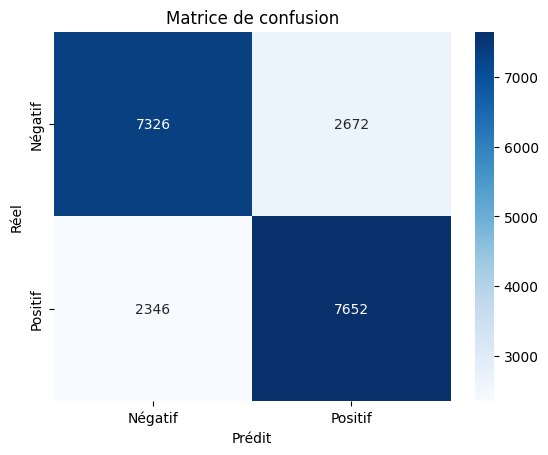

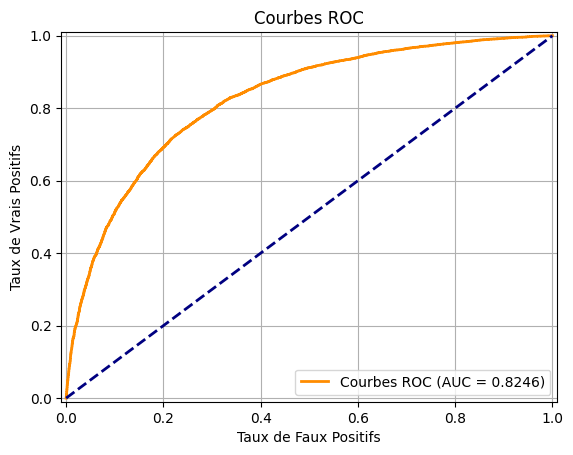

In [ ]:
#Métriques
_metriques()

Vérifications faites : les métriques sont bien les mêmes que sur MLflow ! Yessss !

Prochaine étape : refaire le modèle de Régression Linéaire, mais cette fois, avec recheche des meilleurs hyper-paramètres et cross-validation, le tout en utilisant notre ami GridSearchCV, bien évidemment !

# Partie 5bis : "Modèle sur mesure simple" - Création, entraînement et inférence de notre 1er modèle (Régression Logistique)

## 5.1 : recherche des meilleurs hyper-paramètres & validation croisée avec GridSearchCV

In [ ]:
#Connexion à Google Drive
drive.mount("/content/drive/")

#On charge nos données
dataframe = pandas.read_csv("/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/TextPrepared_Dataset_TrainVal.csv", sep=";")
dataframe.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(79981, 9)

In [ ]:
dataframe

,target,ids,date,flag,user,text,Bag_of_Words_Lemmatise,Bag_of_Words_Racinise,Texte_DeepLearning
0,0,2258146124,Sat Jun 20 15:27:32 PDT 2009,NO_QUERY,duckiedinkis,mourning the loss of my macbook,mourning loss macbook,mourn loss macbook,mourning the loss of my macbook
1,4,1468740719,Tue Apr 07 03:28:42 PDT 2009,NO_QUERY,yippeekid,@aplusk i'm not well just wanna say hi!!!!,aplusk well wanna say hi,aplusk well wanna say hi,aplusk i m not well just wanna say hi
2,4,1752964004,Sat May 09 23:36:48 PDT 2009,NO_QUERY,MCLOVESME,@MariahCarey hi mariah,mariahcarey hi mariah,mariahcarey hi mariah,mariahcarey hi mariah
3,0,2015019394,Wed Jun 03 03:26:59 PDT 2009,NO_QUERY,formulacyan,I can not tell you how sick and tired I am of ...,tell sick tired rain,tell sick tire rain,i can not tell you how sick and tired i am of ...
4,0,1557919262,Sun Apr 19 06:34:20 PDT 2009,NO_QUERY,davey34j,Hyperextended knee playing basketball... not s...,hyperextended knee playing basketball fun,hyperextend knee play basketbal fun,hyperextended knee playing basketball not so fun
...,...,...,...,...,...,...,...,...,...
79976,4,2190763170,Tue Jun 16 03:39:32 PDT 2009,NO_QUERY,bwfc_nozza,"can't wait to see take that, @thescript and @g...",wait see take thescript garygomusic next tuesday,wait see take thescript garygomus next tuesday,can t wait to see take that thescript and gary...
79977,4,1957542567,Fri May 29 00:49:54 PDT 2009,NO_QUERY,regineking,"@NosliwEiggam if i decide to head out after, i...",nosliweiggam decide head definitely give ring,nosliweiggam decid head definit give ring,nosliweiggam if i decide to head out after i l...
79978,0,2176472768,Mon Jun 15 03:58:19 PDT 2009,NO_QUERY,PhilDD531,Goin to class.,goin class,goin class,goin to class
79979,4,1969209277,Fri May 29 23:20:10 PDT 2009,NO_QUERY,Catohhh,@matrocksteady We are SO in a fight.,matrocksteady fight,matrocksteadi fight,matrocksteady we are so in a fight


Petit rappel du "*pourquoi*" on priorise l'Accuracy sur nos modèles :
- <u>**Accuracy**</u> :
  - Les classes sont équilibrées et toutes les erreurs ont le même coût
- <u>**Precision**</u> :
  - On veut éviter les faux positifs (prédire 1 alors que c’est 0)
- <u>**Recall**</u> :
  - On veut éviter les faux négatifs (prédire 0 alors que c’est 1)
- <u>**F1 Score**</u> :
  - On veut trouver un compromis entre précision et rappel, surtout quand les classes sont déséquilibrées
- <u>**ROC AUC**</u> :
  - On veut un résumé global de la capacité du modèle à distinguer les classes (très utile pour la comparaison de modèles). Ne dépend pas du seuil

In [ ]:
#Regression logistique (recherche des meilleurs hyper-paramètres et validation croisée) sur le Bag of Words LEMMATISE - Sauvegardée dans MLflow


#Définition des données X et y
X = dataframe[["Bag_of_Words_Lemmatise"]]
y = dataframe["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=23011977)

#Vectorisation en Bag of Words
vectorizer = TfidfVectorizer() #CountVectorizer() #
X_train_vect = vectorizer.fit_transform(X_train["Bag_of_Words_Lemmatise"])
X_test_vect = vectorizer.transform(X_test["Bag_of_Words_Lemmatise"])


#Hyperparamètres à tester pour la Régression Logistique
hyperParametres = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],
    "solver": ["lbfgs"],
    "max_iter": [500, 1000]
}

#Entraînement du modèle
mlflow.set_experiment("RegressionLogistique")
mlflow.sklearn.autolog(max_tuning_runs=(0)) #On ne garde que le best_run
with mlflow.start_run(run_name="TFIDF-Cross_Validation-BoW_Lemmatise"): #CountVectorizer-Cross_Validation-BoW_Lemmatise"): #
    gscvModel = GridSearchCV(LogisticRegression(class_weight="balanced", random_state=23011977), hyperParametres, scoring="accuracy", cv=5, n_jobs=-1, verbose=1)
    gscvModel.fit(X_train_vect, y_train.values)
    bestModel = gscvModel.best_estimator_
    mlflow.log_params(gscvModel.best_params_)
    mlflow.log_param("test_size", 0.25)
    mlflow.log_param("random_state", 23011977)

    #Inférence
    y_pred = bestModel.predict(X_test_vect)
    y_proba = bestModel.predict_proba(X_test_vect)[:, 1]

    #Logging manuel des métriques liés aux prédictions sur le dataset de validation
    mlflow.log_metric("validation_accuracy_score", accuracy_score(y_test, y_pred))
    mlflow.log_metric("validation_f1_score", f1_score(y_test, y_pred, pos_label=4))
    mlflow.log_metric("validation_precision_score", precision_score(y_test, y_pred, pos_label=4))
    mlflow.log_metric("validation_recall_score", recall_score(y_test, y_pred, pos_label=4))
    mlflow.log_metric("validation_roc_auc", roc_auc_score(y_test, y_proba))

    #Sauvegarde du meilleur modèle (et de son vectorizer) dans MLflow
    pipeline = Pipeline([("vectorizer", vectorizer), ("model", bestModel)])
    mlflow.sklearn.log_model(pipeline, name="Pipeline-TFIDF-BoW_Lemmatise") #Pipeline-CountVectorizer-BoW_Lemmatise") #

Fitting 5 folds for each of 8 candidates, totalling 40 fits


2025/07/25 12:15:31 INFO mlflow.sklearn.utils: Logging no runs, 8 runs will be omitted.
2025/07/25 12:15:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
#Regression logistique (recherche des meilleurs hyper-paramètres et validation croisée) sur le Bag of Words RACINISE - Sauvegardée dans MLflow


#Définition des données X et y
X = dataframe[["Bag_of_Words_Racinise"]]
y = dataframe["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=23011977)

#Vectorisation en Bag of Words
vectorizer = TfidfVectorizer() #CountVectorizer() #
X_train_vect = vectorizer.fit_transform(X_train["Bag_of_Words_Racinise"])
X_test_vect = vectorizer.transform(X_test["Bag_of_Words_Racinise"])


#Hyperparamètres à tester pour la Régression Logistique
hyperParametres = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],
    "solver": ["lbfgs"],
    "max_iter": [500, 1000]
}

#Entraînement du modèle
mlflow.set_experiment("RegressionLogistique")
mlflow.sklearn.autolog(max_tuning_runs=(0)) #On ne garde que le best_run
with mlflow.start_run(run_name="TFIDF-Cross_Validation-BoW_Racinise"): #CountVectorizer-Cross_Validation-BoW_Racinise"): #
    gscvModel = GridSearchCV(LogisticRegression(class_weight="balanced", random_state=23011977), hyperParametres, scoring="accuracy", cv=5, n_jobs=-1, verbose=1)
    gscvModel.fit(X_train_vect, y_train.values)
    bestModel = gscvModel.best_estimator_
    mlflow.log_params(gscvModel.best_params_)
    mlflow.log_param("test_size", 0.25)
    mlflow.log_param("random_state", 23011977)

    #Inférence
    y_pred = bestModel.predict(X_test_vect)
    y_proba = bestModel.predict_proba(X_test_vect)[:, 1]

    #Logging manuel des métriques liés aux prédictions sur le dataset de validation
    mlflow.log_metric("validation_accuracy_score", accuracy_score(y_test, y_pred))
    mlflow.log_metric("validation_f1_score", f1_score(y_test, y_pred, pos_label=4))
    mlflow.log_metric("validation_precision_score", precision_score(y_test, y_pred, pos_label=4))
    mlflow.log_metric("validation_recall_score", recall_score(y_test, y_pred, pos_label=4))
    mlflow.log_metric("validation_roc_auc", roc_auc_score(y_test, y_proba))

    #Sauvegarde du meilleur modèle (et de son vectorizer) dans MLflow
    pipeline = Pipeline([("vectorizer", vectorizer), ("model", bestModel)])
    mlflow.sklearn.log_model(pipeline, name="Pipeline-TFIDF-BoW_Racinise") #Pipeline-CountVectorizer-BoW_Racinise") #

Fitting 5 folds for each of 8 candidates, totalling 40 fits


2025/07/25 12:16:22 INFO mlflow.sklearn.utils: Logging no runs, 8 runs will be omitted.
2025/07/25 12:16:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


## 5.2 : rechargement du meilleur modèle de Régression Logistique depuis MLflow

In [10]:
#Connexion à Google Drive
drive.mount("/content/drive/")

#On charge nos données
dataframe = pandas.read_csv("/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/TextPrepared_Dataset_Test.csv", sep=";")
dataframe.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(1519533, 9)

In [11]:
dataframe

,target,ids,date,flag,user,text,Bag_of_Words_Lemmatise,Bag_of_Words_Racinise,Texte_DeepLearning
0,4,2180525536,Mon Jun 15 10:35:20 PDT 2009,NO_QUERY,TonyMadBony,new August Burns Red song up now!,new august burn red song,new august burn red song,new august burns red song up now
1,4,2178122732,Mon Jun 15 07:13:40 PDT 2009,NO_QUERY,CheapInVegas,@smach241 Excellent tip! I've got so many cas...,smach excellent tip got many casino card could...,smach excel tip got mani casino card could dea...,smach excellent tip i ve got so many casino ca...
2,4,1678111297,Sat May 02 05:32:32 PDT 2009,NO_QUERY,Nemi72,@Morrica I did my cleaning and laundry yesterd...,morrica cleaning laundry yesterday relaxing day,morrica clean laundri yesterday relax day,morrica i did my cleaning and laundry yesterda...
3,4,2067490950,Sun Jun 07 12:26:19 PDT 2009,NO_QUERY,CrunchyNits,"@Karinaaaaaaaaaa Well, i live really close to ...",karinaaaaaaaaaa well live really close falkirk x,karinaaaaaaaaaa well live realli close falkirk x,karinaaaaaaaaaa well i live really close to fa...
4,4,2064229861,Sun Jun 07 05:38:58 PDT 2009,NO_QUERY,XxXsusan94XxX,The first thing I did when I woke up was drink...,first thing woke drink coca cola neeeded energ...,first thing woke drink coca cola neeed energi xx,the first thing i did when i woke up was drink...
...,...,...,...,...,...,...,...,...,...
1519528,0,2057760968,Sat Jun 06 13:36:41 PDT 2009,NO_QUERY,Nathan133,@Clubpenguinfan3 bye - nobody tweeting,clubpenguinfan bye nobody tweeting,clubpenguinfan bye nobodi tweet,clubpenguinfan bye nobody tweeting
1519529,4,1956124980,Thu May 28 21:14:11 PDT 2009,NO_QUERY,MelissaHeckman,"Taken for granted, completely enchanted by you.",taken granted completely enchanted,taken grant complet enchant,taken for granted completely enchanted by you
1519530,0,2059119021,Sat Jun 06 16:17:05 PDT 2009,NO_QUERY,LUVNSTYLES,@GsoHandsome I invited u brotha.. U turned me ...,gsohandsome invited u brotha u turned lol naa ...,gsohandsom invit u brotha u turn lol naa find ...,gsohandsome i invited u brotha u turned me dow...
1519531,0,2251470986,Sat Jun 20 03:36:42 PDT 2009,NO_QUERY,MonteCarlo311,FUCK I LOST HER,fuck lost,fuck lost,fuck i lost her


In [12]:
#Chargement du pipeline
#Correspond au modèle : RegressionLogistique / TF-IDF / BoW Racinisé (MLflow run_id : 2ab336eab25d4b21af6ac871e7ea087e)
meilleurModeleCharge = _chargeModeleSKLearnMLflow("RegressionLogistique_BestModel", "1")

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=500,
                                    random_state=23011977))])

In [13]:
#Test manuel sur 2 faux tweets


#Utilisation du pipeline "à la mano" pour tester
nouveauxTweets = ["I am very sad today, the weather is horrible", "Too happy, it's my birthday, and all my best friends sent me a wonderful gift !"]

#Prédictions
predictions = meilleurModeleCharge.predict(nouveauxTweets)
probas = meilleurModeleCharge.predict_proba(nouveauxTweets)[:, 1]

#Affichage
for txt, pred, proba in zip(nouveauxTweets, predictions, probas):
    print("Texte :", txt)
    print("Classe prédite : ", pred, "\n --> Probabilité classe 0 (NEGATIVE) = ", round((1-proba)*100, 2), "%\n --> Probabilité classe 4 (POSITIVE) = ", round(proba*100, 2), "%\n", sep="")

Texte : I am very sad today, the weather is horrible
Classe prédite : 0
 --> Probabilité classe 0 (NEGATIVE) = 99.72%
 --> Probabilité classe 4 (POSITIVE) = 0.28%

Texte : Too happy, it's my birthday, and all my best friends sent me a wonderful gift !
Classe prédite : 4
 --> Probabilité classe 0 (NEGATIVE) = 11.71%
 --> Probabilité classe 4 (POSITIVE) = 88.29%



## 5.3 : test du meilleur modèle (pipeline Vectorizer + Régression Logistique) sur les données de test (1,5 millions de Tweets)

In [18]:
#Définition des données X et y
X_test = dataframe["Bag_of_Words_Racinise"]
y_test = dataframe["target"]

#Pédictions avec le pipeline MLflow
y_pred = meilleurModeleCharge.predict(X_test)
y_proba = meilleurModeleCharge.predict_proba(X_test)[:, 1]

Accuracy	: 0.756723940842351

ROC AUC score	: 0.8360623814708232

Rapport de classification :
              precision    recall  f1-score   support

     Négatif       0.76      0.74      0.75    759750
     Positif       0.75      0.77      0.76    759783

    accuracy                           0.76   1519533
   macro avg       0.76      0.76      0.76   1519533
weighted avg       0.76      0.76      0.76   1519533



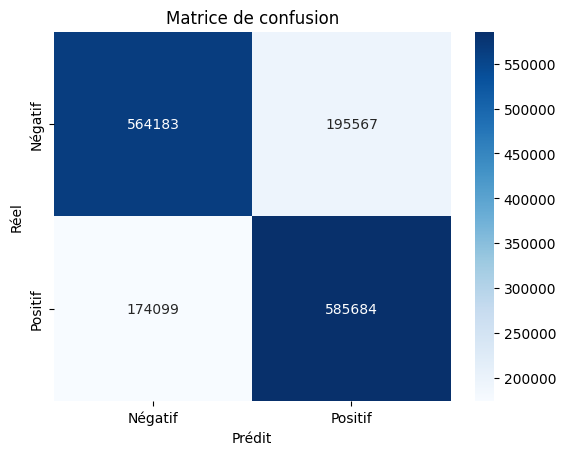

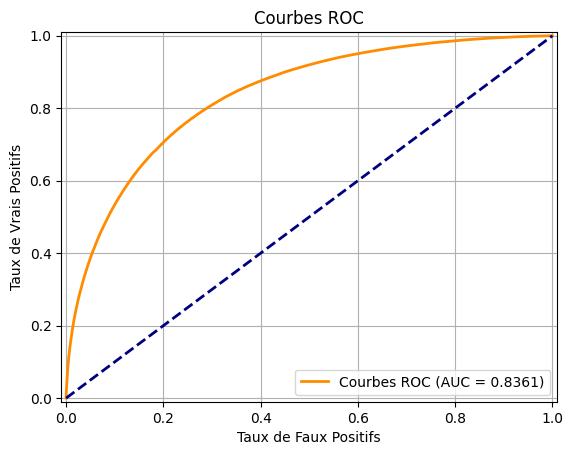

In [19]:
#Métriques
_metriques()

# Partie 6 : "Modèle sur mesure avancé" - Création, entraînement et inférence de notre 1er modèle

In [ ]:
#Connexion à Google Drive
drive.mount("/content/drive/")

#On charge nos données
dataframe = pandas.read_csv("/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/TextPrepared_Dataset_TrainVal.csv", sep=";")
dataframe.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(79981, 9)

In [ ]:
dataframe

,target,ids,date,flag,user,text,Bag_of_Words_Lemmatise,Bag_of_Words_Racinise,Texte_DeepLearning
0,0,2258146124,Sat Jun 20 15:27:32 PDT 2009,NO_QUERY,duckiedinkis,mourning the loss of my macbook,mourning loss macbook,mourn loss macbook,mourning the loss of my macbook
1,4,1468740719,Tue Apr 07 03:28:42 PDT 2009,NO_QUERY,yippeekid,@aplusk i'm not well just wanna say hi!!!!,aplusk well wanna say hi,aplusk well wanna say hi,aplusk i m not well just wanna say hi
2,4,1752964004,Sat May 09 23:36:48 PDT 2009,NO_QUERY,MCLOVESME,@MariahCarey hi mariah,mariahcarey hi mariah,mariahcarey hi mariah,mariahcarey hi mariah
3,0,2015019394,Wed Jun 03 03:26:59 PDT 2009,NO_QUERY,formulacyan,I can not tell you how sick and tired I am of ...,tell sick tired rain,tell sick tire rain,i can not tell you how sick and tired i am of ...
4,0,1557919262,Sun Apr 19 06:34:20 PDT 2009,NO_QUERY,davey34j,Hyperextended knee playing basketball... not s...,hyperextended knee playing basketball fun,hyperextend knee play basketbal fun,hyperextended knee playing basketball not so fun
...,...,...,...,...,...,...,...,...,...
79976,4,2190763170,Tue Jun 16 03:39:32 PDT 2009,NO_QUERY,bwfc_nozza,"can't wait to see take that, @thescript and @g...",wait see take thescript garygomusic next tuesday,wait see take thescript garygomus next tuesday,can t wait to see take that thescript and gary...
79977,4,1957542567,Fri May 29 00:49:54 PDT 2009,NO_QUERY,regineking,"@NosliwEiggam if i decide to head out after, i...",nosliweiggam decide head definitely give ring,nosliweiggam decid head definit give ring,nosliweiggam if i decide to head out after i l...
79978,0,2176472768,Mon Jun 15 03:58:19 PDT 2009,NO_QUERY,PhilDD531,Goin to class.,goin class,goin class,goin to class
79979,4,1969209277,Fri May 29 23:20:10 PDT 2009,NO_QUERY,Catohhh,@matrocksteady We are SO in a fight.,matrocksteady fight,matrocksteadi fight,matrocksteady we are so in a fight


## 6.1 : création du modèle

In [ ]:
#Fonction de création de notre nouveau modèle de Deep Learning avec couche Bi-LSTM
#
#INPUT :
########
#    _inputTailleVocabulaire          : Taille du vocabulaire
#    _inputDimensionVecteursEmbedding : Dimension des vecteurs d'embedding
#    _inputMatricePoids               : Matrice de poids pour la couche d'embedding
#    _inputLongueurMaxiSeqEntree      : Longueur maximale des séquences d'entrée
#
#OUTPUT :
#########
#    Le modèle compilé
#
def modelDeepLearningBiLSTM(_inputTailleVocabulaire, _inputDimensionVecteursEmbedding, _inputMatricePoids, _inputLongueurMaxiSeqEntree):
    input_text = Input(shape=(_inputLongueurMaxiSeqEntree,), name="Input_Text")
    coucheEmbedding = Embedding(input_dim=_inputTailleVocabulaire, output_dim=_inputDimensionVecteursEmbedding, embeddings_initializer=Constant(_inputMatricePoids), input_length=_inputLongueurMaxiSeqEntree, trainable=False, name="Couche_Embedding")
    x = coucheEmbedding(input_text)
    x = Bidirectional(LSTM(64, return_sequences=False, dropout=0.3), name="BiLSTM")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    output = Dense(1, activation="sigmoid", name="Output")(x)
    model = Model(inputs=input_text, outputs=output, name="modelDeepLearningBiLSTM")
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

## 6.2 : création des Embeddings Lemmatisés

### 6.2.1 : Word2Vec

In [ ]:
#WORD2VEC LEMMATISE


#Etape 1 : préparation des données pour Word2Vec
corpusLemmatise = dataframe["Bag_of_Words_Lemmatise"].astype(str).apply(str.split).tolist()

#Etape 2 : entraînement du modèle Word2Vec
modelWord2VecLem = Word2Vec(sentences=corpusLemmatise, vector_size=300, window=5, min_count=1, workers=4, sg=1, seed=23011977)

#Etape 3 : tokenisation avec Keras
tokenizerLem_W2V = Tokenizer()
tokenizerLem_W2V.fit_on_texts(dataframe["Bag_of_Words_Lemmatise"].astype(str))
wordIndex = tokenizerLem_W2V.word_index
tailleVocabulaireLem_W2V = len(wordIndex) + 1

#Etape 4 : création de la matrice d'Embedding
dimensionEmbedding = 300
matriceEmbeddingLem_W2V = numpy.zeros((tailleVocabulaireLem_W2V, dimensionEmbedding)) #La matrice pour la couche Embedding
for mot, i in wordIndex.items():
    if(mot in modelWord2VecLem.wv):
        matriceEmbeddingLem_W2V[i] = modelWord2VecLem.wv[mot]
    else:
        matriceEmbeddingLem_W2V[i] = numpy.random.normal(scale=0.6, size=(dimensionEmbedding,))

#Etape 5 : transformation des textes en séquences d'indices
X_lemmatise_W2V = tokenizerLem_W2V.texts_to_sequences(dataframe["Bag_of_Words_Lemmatise"].astype(str))

#Etape 6 : padding des séquences
max_sequence_length = 100
X_lemmatise_padded_W2V = pad_sequences(X_lemmatise_W2V, maxlen=max_sequence_length, padding="post") #Les entrées prêtes pour le modèle

#Etape 7 : vérifications
print("X_lemmatise_padded_W2V shape  :", X_lemmatise_padded_W2V.shape)
print("matriceEmbeddingLem_W2V shape :", matriceEmbeddingLem_W2V.shape)

X_lemmatise_padded_W2V shape  : (79981, 100)
matriceEmbeddingLem_W2V shape : (73105, 300)


### 6.2.2 : FastText

In [ ]:
#FASTTEXT LEMMATISE


#Etape 1 : préparation des données pour FastText
corpusLemmatise = dataframe["Bag_of_Words_Lemmatise"].astype(str).apply(str.split).tolist()

#Etape 2 : entraînement du modèle FastText
modelFastTextLem = FastText(sentences=corpusLemmatise, vector_size=300, window=5, min_count=1, workers=4, sg=1, seed=23011977)

#Etape 3 : tokenisation avec Keras
tokenizerLem_FT = Tokenizer()
tokenizerLem_FT.fit_on_texts(dataframe["Bag_of_Words_Lemmatise"].astype(str))
wordIndex = tokenizerLem_FT.word_index
tailleVocabulaireLem_FT = len(wordIndex) + 1

#Etape 4 : création de la matrice d'Embedding
dimensionEmbedding = 300
matriceEmbeddingLem_FT = numpy.zeros((tailleVocabulaireLem_FT, dimensionEmbedding)) #La matrice pour la couche Embedding
for mot, i in wordIndex.items():
    if(mot in modelFastTextLem.wv):
        matriceEmbeddingLem_FT[i] = modelFastTextLem.wv[mot]
    else:
        matriceEmbeddingLem_FT[i] = numpy.random.normal(scale=0.6, size=(dimensionEmbedding,))

#Etape 5 : transformation des textes en séquences d'indices
X_lemmatise_FT = tokenizerLem_FT.texts_to_sequences(dataframe["Bag_of_Words_Lemmatise"].astype(str))

#Etape 6 : padding des séquences
max_sequence_length = 100
X_lemmatise_padded_FT = pad_sequences(X_lemmatise_FT, maxlen=max_sequence_length, padding="post") #Les entrées prêtes pour le modèle

#Etape 7 : vérifications
print("X_lemmatise_padded_FT shape  :", X_lemmatise_padded_FT.shape)
print("matriceEmbeddingLem_FT shape :", matriceEmbeddingLem_FT.shape)

X_lemmatise_padded_FT shape  : (79981, 100)
matriceEmbeddingLem_FT shape : (73105, 300)


### 6.2.3 : GloVe

In [ ]:
#GLOVE LEMMATISE


#Etape 1 : préparation des données pour GloVe
corpusLemmatise = dataframe["Bag_of_Words_Lemmatise"].astype(str).tolist()

#Etape 2 : tokenisation avec Keras
tokenizerLem_GloVe = Tokenizer()
tokenizerLem_GloVe.fit_on_texts(corpusLemmatise)
wordIndex = tokenizerLem_GloVe.word_index
tailleVocabulaireLem_GloVe = len(wordIndex) + 1

#Etape 3 : Chargement des vecteurs GloVe pré-entraînés (300d)
glovePath = "/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/GloVe/glove.6B.300d.txt"
embeddingsIndex = {}
print("Chargement des vecteurs GloVe")
with open(glovePath, "r", encoding="utf8") as fichier:
    for line in fichier:
        values = line.split()
        mot = values[0]
        vecteur = numpy.asarray(values[1:], dtype="float32")
        embeddingsIndex[mot] = vecteur
print("Nombre de mots dans GloVe :", len(embeddingsIndex))

#Etape 4 : création de la matrice d'Embedding
dimensionEmbedding = 300
matriceEmbeddingLem_GloVe = numpy.zeros((tailleVocabulaireLem_GloVe, dimensionEmbedding)) #La matrice pour la couche Embedding
for mot, i in wordIndex.items():
    vecteur = embeddingsIndex.get(mot)
    if(vecteur is not None):
        matriceEmbeddingLem_GloVe[i] = vecteur
    else:
        matriceEmbeddingLem_GloVe[i] = numpy.random.normal(scale=0.6, size=(dimensionEmbedding,))

#Etape 5 : transformation des textes en séquences d'indices
X_lemmatise_GloVe = tokenizerLem_GloVe.texts_to_sequences(corpusLemmatise)

#Etape 6 : padding des séquences
max_sequence_length = 100
X_lemmatise_padded_GloVe = pad_sequences(X_lemmatise_GloVe, maxlen=max_sequence_length, padding="post") #Les entrées prêtes pour le modèle

#Etape 7 : vérifications
print("X_lemmatise_padded_GloVe shape  :", X_lemmatise_padded_GloVe.shape)
print("matriceEmbeddingLem_GloVe shape :", matriceEmbeddingLem_GloVe.shape)

Chargement des vecteurs GloVe
Nombre de mots dans GloVe : 400000
X_lemmatise_padded_GloVe shape  : (79981, 100)
matriceEmbeddingLem_GloVe shape : (73105, 300)


## 6.3 : création des Embedding Racinisés

### 6.3.1 : Word2Vec

In [ ]:
#WORD2VEC RACINISE


#Etape 1 : préparation des données pour Word2Vec
corpusRacinise = dataframe["Bag_of_Words_Racinise"].astype(str).apply(str.split).tolist()

#Etape 2 : entraînement du modèle Word2Vec
modelWord2VecStem = Word2Vec(sentences=corpusRacinise, vector_size=300, window=5, min_count=1, workers=4, sg=1, seed=23011977)

#Etape 3 : tokenisation avec Keras
tokenizerStem_W2V = Tokenizer()
tokenizerStem_W2V.fit_on_texts(dataframe["Bag_of_Words_Racinise"].astype(str))
wordIndex = tokenizerStem_W2V.word_index
tailleVocabulaireStem_W2V = len(wordIndex) + 1

#Etape 4 : création de la matrice d'Embedding
dimensionEmbedding = 300
matriceEmbeddingStem_W2V = numpy.zeros((tailleVocabulaireStem_W2V, dimensionEmbedding)) #La matrice pour la couche Embedding
for mot, i in wordIndex.items():
    if(mot in modelWord2VecStem.wv):
        matriceEmbeddingStem_W2V[i] = modelWord2VecStem.wv[mot]
    else:
        matriceEmbeddingStem_W2V[i] = numpy.random.normal(scale=0.6, size=(dimensionEmbedding,))

#Etape 5 : transformation des textes en séquences d'indices
X_racinise_W2V = tokenizerStem_W2V.texts_to_sequences(dataframe["Bag_of_Words_Racinise"].astype(str))

#Etape 6 : padding des séquences
max_sequence_length = 100
X_racinise_padded_W2V = pad_sequences(X_racinise_W2V, maxlen=max_sequence_length, padding="post") #Les entrées prêtes pour le modèle

#Etape 7 : vérifications
print("X_racinise_padded_W2V shape    :", X_racinise_padded_W2V.shape)
print("matriceEmbeddingStem_W2V shape :", matriceEmbeddingStem_W2V.shape)

X_racinise_padded_W2V shape    : (79981, 100)
matriceEmbeddingStem_W2V shape : (66804, 300)


### 6.3.3 : FastText

In [ ]:
#FASTTEXT RACINISE

#Etape 1 : préparation des données pour FastText
corpusRacinise = dataframe["Bag_of_Words_Racinise"].astype(str).apply(str.split).tolist()

#Etape 2 : entraînement du modèle FastText
modelFastTextStem = FastText(sentences=corpusRacinise, vector_size=300, window=5, min_count=1, workers=4, sg=1, seed=23011977)

#Etape 3 : tokenisation avec Keras
tokenizerStem_FT = Tokenizer()
tokenizerStem_FT.fit_on_texts(dataframe["Bag_of_Words_Racinise"].astype(str))
wordIndex = tokenizerStem_FT.word_index
tailleVocabulaireStem_FT = len(wordIndex) + 1

#Etape 4 : création de la matrice d'Embedding
dimensionEmbedding = 300
matriceEmbeddingStem_FT = numpy.zeros((tailleVocabulaireStem_FT, dimensionEmbedding)) #La matrice pour la couche Embedding
for mot, i in wordIndex.items():
    if(mot in modelFastTextStem.wv):
        matriceEmbeddingStem_FT[i] = modelFastTextStem.wv[mot]
    else:
        matriceEmbeddingStem_FT[i] = numpy.random.normal(scale=0.6, size=(dimensionEmbedding,))

#Etape 5 : transformation des textes en séquences d'indices
X_racinise_FT = tokenizerStem_FT.texts_to_sequences(dataframe["Bag_of_Words_Racinise"].astype(str))

#Etape 6 : padding des séquences
max_sequence_length = 100
X_racinise_padded_FT = pad_sequences(X_racinise_FT, maxlen=max_sequence_length, padding="post") #Les entrées prêtes pour le modèle

#Etape 7 : vérifications
print("X_racinise_padded_FT shape  :", X_racinise_padded_FT.shape)
print("matriceEmbeddingStem_FT shape :", matriceEmbeddingStem_FT.shape)

X_racinise_padded_FT shape  : (79981, 100)
matriceEmbeddingStem_FT shape : (66804, 300)


### 6.3.3 : GloVe

In [ ]:
#GLOVE RACINISE


#Etape 1 : préparation des données pour GloVe
corpusRacinise = dataframe["Bag_of_Words_Racinise"].astype(str).tolist()

#Etape 2 : tokenisation avec Keras
tokenizerStem_GloVe = Tokenizer()
tokenizerStem_GloVe.fit_on_texts(corpusRacinise)
wordIndex = tokenizerStem_GloVe.word_index
tailleVocabulaireStem_GloVe = len(wordIndex) + 1

#Etape 3 : Chargement des vecteurs GloVe pré-entraînés (300d)
glovePath = "/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/GloVe/glove.6B.300d.txt"
embeddingsIndex = {}
print("Chargement des vecteurs GloVe")
with open(glovePath, "r", encoding="utf8") as fichier:
    for line in fichier:
        values = line.split()
        mot = values[0]
        vecteur = numpy.asarray(values[1:], dtype="float32")
        embeddingsIndex[mot] = vecteur
print("Nombre de mots dans GloVe :", len(embeddingsIndex))

#Etape 4 : création de la matrice d'Embedding
dimensionEmbedding = 300
matriceEmbeddingStem_GloVe = numpy.zeros((tailleVocabulaireStem_GloVe, dimensionEmbedding))
for mot, i in wordIndex.items():
    vecteur = embeddingsIndex.get(mot)
    if(vecteur is not None):
        matriceEmbeddingStem_GloVe[i] = vecteur
    else:
        matriceEmbeddingStem_GloVe[i] = numpy.random.normal(scale=0.6, size=(dimensionEmbedding,))

#Etape 5 : transformation des textes en séquences d'indices
X_racinise_GloVe = tokenizerStem_GloVe.texts_to_sequences(corpusRacinise)

#Etape 6 : padding des séquences
max_sequence_length = 100
X_racinise_padded_GloVe = pad_sequences(X_racinise_GloVe, maxlen=max_sequence_length, padding="post") #Les entrées prêtes pour le modèle

#Etape 7 : vérifications
print("X_racinise_padded_GloVe shape    :", X_racinise_padded_GloVe.shape)
print("matriceEmbeddingStem_GloVe shape :", matriceEmbeddingStem_GloVe.shape)

Chargement des vecteurs GloVe
Nombre de mots dans GloVe : 400000
X_racinise_padded_GloVe shape    : (79981, 100)
matriceEmbeddingStem_GloVe shape : (66804, 300)


## 6.4 : entraînement du modèle Deep Learning (MLflow)

In [ ]:
#Entrainement du modèle


# Type de modèle d'embedding à utiliser : "Word2Vec", "FastText" ou "GloVe"
modeleDEmbeddingRetenu = "GloVe"

# Type de prétraitement à utiliser : "Lemmatisation" ou "Racinisation"
typeDePreTraitementRetenu = "Racinisation"

match modeleDEmbeddingRetenu:
    case "Word2Vec":
        match typeDePreTraitementRetenu:
            case "Lemmatisation":
                X_padded = X_lemmatise_padded_W2V
                matriceEmbedding = matriceEmbeddingLem_W2V
                tailleVocabulaire = tailleVocabulaireLem_W2V
                vectorizer = modelWord2VecLem
                runName = "Word2Vec-Lemmatise"
                pipelineName = "Pipeline-Word2Vec-Lemmatise"
                pipelinePackageName = "Pipeline-Word2Vec-Lemmatise.pkl"
            case "Racinisation":
                X_padded = X_racinise_padded_W2V
                matriceEmbedding = matriceEmbeddingStem_W2V
                tailleVocabulaire = tailleVocabulaireStem_W2V
                vectorizer = modelWord2VecStem
                runName = "Word2Vec-Racinise"
                pipelineName = "Pipeline-Word2Vec-Racinise"
                pipelinePackageName = "Pipeline-Word2Vec-Racinise.pkl"
            case _:
                raise ValueError("Le type de pré-traitement retenu doit être : \"Lemmatisation\" ou \"Racinisation\" !")

    case "FastText":
        match typeDePreTraitementRetenu:
            case "Lemmatisation":
                X_padded = X_lemmatise_padded_FT
                matriceEmbedding = matriceEmbeddingLem_FT
                tailleVocabulaire = tailleVocabulaireLem_FT
                vectorizer = modelFastTextLem
                runName = "FastText-Lemmatise"
                pipelineName = "Pipeline-FastText-Lemmatise"
                pipelinePackageName = "Pipeline-FastText-Lemmatise.pkl"
            case "Racinisation":
                X_padded = X_racinise_padded_FT
                matriceEmbedding = matriceEmbeddingStem_FT
                tailleVocabulaire = tailleVocabulaireStem_FT
                vectorizer = modelFastTextStem
                runName = "FastText-Racinise"
                pipelineName = "Pipeline-FastText-Racinise"
                pipelinePackageName = "Pipeline-FastText-Racinise.pkl"
            case _:
                raise ValueError("Le type de pré-traitement retenu doit être : \"Lemmatisation\" ou \"Racinisation\" !")

    case "GloVe":
        match typeDePreTraitementRetenu:
            case "Lemmatisation":
                X_padded = X_lemmatise_padded_GloVe
                matriceEmbedding = matriceEmbeddingLem_GloVe
                tailleVocabulaire = tailleVocabulaireLem_GloVe
                vectorizer = tokenizerLem_GloVe
                runName = "GloVe-Lemmatise"
                pipelineName = "Pipeline-GloVe-Lemmatise"
                pipelinePackageName = "Pipeline-GloVe-Lemmatise.pkl"
            case "Racinisation":
                X_padded = X_racinise_padded_GloVe
                matriceEmbedding = matriceEmbeddingStem_GloVe
                tailleVocabulaire = tailleVocabulaireStem_GloVe
                vectorizer = tokenizerStem_GloVe
                runName = "GloVe-Racinise"
                pipelineName = "Pipeline-GloVe-Racinise"
                pipelinePackageName = "Pipeline-GloVe-Racinise.pkl"
            case _:
                raise ValueError("Le type de pré-traitement retenu doit être : \"Lemmatisation\" ou \"Racinisation\" !")

    case _:
        raise ValueError("Le modèle d'embedding retenu doit être : \"Word2Vec\", \"FastText\" ou \"GloVe\" !")


#On récupère "y" (qu'on remap "0"/"1", au lieu de "0"/"4")
y = dataframe["target"].map({0: 0, 4: 1}).values

#Séparation TRAIN / VALIDATION
X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.25, stratify=y, random_state=23011977)

#Création du modèle à partir de la fonction définie
modelDL = modelDeepLearningBiLSTM(tailleVocabulaire, 300, matriceEmbedding, 100)

#Définition du chemin de sauvegarde pour le meilleur modèle
cheminMeilleurModel = "best_model.keras"

#Callback pour sauvegarder le meilleur modèle (val_loss)
checkPointModel = ModelCheckpoint(filepath=cheminMeilleurModel, monitor="val_loss", save_best_only=True, mode="min", verbose=1)
earlyStopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5) # <-- Si on veut mettre en place un earlyStopping
listCallbacks = [checkPointModel, earlyStopping] # <-- Si on veut mettre en place un earlyStopping

#Entraînement du modèle
mlflow.set_experiment("DeepLearning")
mlflow.tensorflow.autolog()
with mlflow.start_run(run_name=runName):
    mlflow.log_param("preprocessing_type", typeDePreTraitementRetenu)
    mlflow.set_tag("model_type", "BiLSTM")
    history = modelDL.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=1, callbacks=[checkPointModel]) # callbacks=listCallbacks) # <-- Si on veut mettre en place un earlyStopping

    #Rechargement du meilleur modèle (meilleur Epoch)
    bestModel = tensorflow.keras.models.load_model(cheminMeilleurModel)

    #Logging manuel des métriques sur le dataset d'entraînement
    y_train_proba = bestModel.predict(X_train).flatten()
    y_train_pred = (y_train_proba >= 0.5).astype(int)
    _metriquesMLflow("train", y_train, y_train_pred, y_train_proba)

    #Logging manuel des métriques liés aux prédictions sur le dataset de validation
    y_proba = bestModel.predict(X_val).flatten()
    y_pred = (y_proba >= 0.5).astype(int)
    _metriquesMLflow("validation", y_val, y_pred, y_proba)

    #Sauvegarde du meilleur modèle (et de son vectorizer) dans MLflow
    print("Enregistrement du pipeline [Vectorizer + bestModel]")

    #Modèles GenSim (Word2Vec & FastText)
    if(modeleDEmbeddingRetenu in ["Word2Vec", "FastText"]):
        #Sauvegarde du modèle TensorFlow
        mlflow.log_artifact("best_model.keras", artifact_path=pipelineName)

        #Sauvegarde du modèle GenSim séparément
        genSimModelPath = pipelineName + "_gensim.model"
        vectorizer.save(genSimModelPath)
        mlflow.log_artifact(genSimModelPath, artifact_path=pipelineName)

        #Enregistre un pipeline "proxy" simple, car joblib ne gère pas directement les modèles gensim (...merci ChatGPT, pour le coup !)
        pipelinePath = pipelinePackageName + "_placeholder.pkl"
        with open(pipelinePath, "wb") as fichier:
            pickle.dump("Le pipeline complet n'est pas directement sauvegardé, car GenSim n’est pas compatible avec joblib", fichier)
        mlflow.log_artifact(pipelinePath, artifact_path=pipelineName)

    #Modèle GloVe
    else:
        #Pour GloVe, on peut sauvegarder directement le pipeline avec Tokenizer + Modèle
        pipeline = Pipeline([("vectorizer", vectorizer), ("model", bestModel)])
        joblib.dump(pipeline, pipelinePackageName)
        mlflow.log_artifact(pipelinePackageName, artifact_path=pipelineName)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6259 - loss: 0.6588
Epoch 1: val_loss improved from inf to 0.57535, saving model to best_model.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 182s 95ms/step - accuracy: 0.6259 - loss: 0.6587 - val_accuracy: 0.6952 - val_loss: 0.5754
Epoch 2/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7092 - loss: 0.5585
Epoch 2: val_loss did not improve from 0.57535
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 118s 63ms/step - accuracy: 0.7092 - loss: 0.5585 - val_accuracy: 0.6670 - val_loss: 0.6410
Epoch 3/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7378 - loss: 0.5240
Epoch 3: val_loss improved from 0.57535 to 0.52047, saving model to best_model.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 173s 92ms/step - accuracy: 0.7377 - loss: 0.5240 - val_accuracy: 0.7392 - val_loss: 0.5205
Epoch 4/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7499 - loss: 0.5062
Epoch 4: val_loss improved from 0.52047 to 0.51606, saving model to best_model.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 175s 93ms/step - accuracy: 0.7499 - loss: 0.5062 - val_accuracy: 0.7419 - val_loss: 0.5161
Epoch 5/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7598 - loss: 0.4912
Epoch 5: val_loss did not improve from 0.51606
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 116s 62ms/step - accuracy: 0.7598 - loss: 0.4912 - val_accuracy: 0.7426 - val_loss: 0.5220
Epoch 6/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7684 - loss: 0.4777
Epoch 6: val_loss improved from 0.51606 to 0.51362, saving model to best_model.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 179s 96ms/step - accuracy: 0.7684 - loss: 0.4777 - val_accuracy: 0.7471 - val_loss: 0.5136
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7766 - loss: 0.4644
Epoch 7: val_loss improved from 0.51362 to 0.51306, saving model to best_model.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 179s 96ms/step - accuracy: 0.7766 - loss: 0.4644 - val_accuracy: 0.7466 - val_loss: 0.5131
Epoch 8/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7834 - loss: 0.4559
Epoch 8: val_loss did not improve from 0.51306
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 124s 66ms/step - accuracy: 0.7834 - loss: 0.4559 - val_accuracy: 0.7430 - val_loss: 0.5191
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7855 - loss: 0.4498
Epoch 9: val_loss did not improve from 0.51306
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 118s 63ms/step - accuracy: 0.7855 - loss: 0.4498 - val_accuracy: 0.7465 - val_loss: 0.5158
Epoch 10/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7914 - loss: 0.4417
Epoch 10: val_loss did not improve from 0.51306
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 122s 65ms/step - accuracy: 0.7914 - loss: 0.4417 - val_accuracy: 0.7480 - val_loss: 0.5177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


2025/07/29 13:11:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step
Enregistrement des métriques de la phase "train"


625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step
Enregistrement des métriques de la phase "validation"


Enregistrement du pipeline [Vectorizer + bestModel]


## 6.5 : chargement du meilleur modèle et test de prédiction sur les données de test (1,5 millions de Tweets)

In [7]:
#Connexion à Google Drive
drive.mount("/content/drive/")

#On charge nos données
dataframe = pandas.read_csv("/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/TextPrepared_Dataset_Test.csv", sep=";")
dataframe.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(1519533, 9)

In [9]:
dataframe

,target,ids,date,flag,user,text,Bag_of_Words_Lemmatise,Bag_of_Words_Racinise,Texte_DeepLearning
0,4,2180525536,Mon Jun 15 10:35:20 PDT 2009,NO_QUERY,TonyMadBony,new August Burns Red song up now!,new august burn red song,new august burn red song,new august burns red song up now
1,4,2178122732,Mon Jun 15 07:13:40 PDT 2009,NO_QUERY,CheapInVegas,@smach241 Excellent tip! I've got so many cas...,smach excellent tip got many casino card could...,smach excel tip got mani casino card could dea...,smach excellent tip i ve got so many casino ca...
2,4,1678111297,Sat May 02 05:32:32 PDT 2009,NO_QUERY,Nemi72,@Morrica I did my cleaning and laundry yesterd...,morrica cleaning laundry yesterday relaxing day,morrica clean laundri yesterday relax day,morrica i did my cleaning and laundry yesterda...
3,4,2067490950,Sun Jun 07 12:26:19 PDT 2009,NO_QUERY,CrunchyNits,"@Karinaaaaaaaaaa Well, i live really close to ...",karinaaaaaaaaaa well live really close falkirk x,karinaaaaaaaaaa well live realli close falkirk x,karinaaaaaaaaaa well i live really close to fa...
4,4,2064229861,Sun Jun 07 05:38:58 PDT 2009,NO_QUERY,XxXsusan94XxX,The first thing I did when I woke up was drink...,first thing woke drink coca cola neeeded energ...,first thing woke drink coca cola neeed energi xx,the first thing i did when i woke up was drink...
...,...,...,...,...,...,...,...,...,...
1519528,0,2057760968,Sat Jun 06 13:36:41 PDT 2009,NO_QUERY,Nathan133,@Clubpenguinfan3 bye - nobody tweeting,clubpenguinfan bye nobody tweeting,clubpenguinfan bye nobodi tweet,clubpenguinfan bye nobody tweeting
1519529,4,1956124980,Thu May 28 21:14:11 PDT 2009,NO_QUERY,MelissaHeckman,"Taken for granted, completely enchanted by you.",taken granted completely enchanted,taken grant complet enchant,taken for granted completely enchanted by you
1519530,0,2059119021,Sat Jun 06 16:17:05 PDT 2009,NO_QUERY,LUVNSTYLES,@GsoHandsome I invited u brotha.. U turned me ...,gsohandsome invited u brotha u turned lol naa ...,gsohandsom invit u brotha u turn lol naa find ...,gsohandsome i invited u brotha u turned me dow...
1519531,0,2251470986,Sat Jun 20 03:36:42 PDT 2009,NO_QUERY,MonteCarlo311,FUCK I LOST HER,fuck lost,fuck lost,fuck i lost her


Le modèle de Deep Learning qui a le mieux performé sur la partie validation (*métrique utilisée : "**accuracy**"*) est celui qui a utilisé l'embedding fait par GloVe sur les données Lemmatisée

In [10]:
#Chargement du pipeline
#Correspond au modèle : RegressionLogistique / TF-IDF / BoW Racinisé (MLflow run_id : 2ab336eab25d4b21af6ac871e7ea087e)
cheminPipeline = "///content/drive/My Drive/Colab_Notebooks/Project_7/MLflow_data/734748334327253282/a24869ac6249420d81f856503a91727d/artifacts/Pipeline-GloVe-Lemmatise/Pipeline-GloVe-Lemmatise.pkl" #Chemin trouvé dans les MLflow - Experiment : "DeepLearning" / Meilleur Run : "FastText-Lemmatise" / Artifacts
pipeline = joblib.load(cheminPipeline)

In [11]:
#Test manuel sur 2 faux tweets


texteDeTestPositif = ["Too happy, it's my birthday, and all my best friends sent me a wonderful gift !"]
texteDeTestNegatif = ["I am very sad today, the weather is horrible"]

X_test_vect = pipeline.named_steps["vectorizer"].texts_to_sequences(texteDeTestPositif)
X_test_pad = tensorflow.keras.preprocessing.sequence.pad_sequences(X_test_vect, maxlen=100, padding="post")
proba = pipeline.named_steps["model"].predict(X_test_pad)
pred = (proba >= 0.5).astype(int)
#print("Classe prédite :", pred[0], " - Probabilité :", proba[0][0])
print("\n\nTexte :", texteDeTestPositif)
print("Classe prédite : ", pred[0], "\n --> Probabilité classe 0 (NEGATIVE) = ", round((1-proba[0][0])*100, 2), "%\n --> Probabilité classe 4 (POSITIVE) = ", round(proba[0][0]*100, 2), "%\n", sep="")

X_test_vect = pipeline.named_steps["vectorizer"].texts_to_sequences(texteDeTestNegatif)
X_test_pad = tensorflow.keras.preprocessing.sequence.pad_sequences(X_test_vect, maxlen=100, padding="post")
proba = pipeline.named_steps["model"].predict(X_test_pad)
pred = (proba >= 0.5).astype(int)
#print("\n\nClasse prédite :", pred[0], " - Probabilité :", proba[0][0])
print("Texte :", texteDeTestNegatif)
print("Classe prédite : ", pred[0], "\n --> Probabilité classe 0 (NEGATIVE) = ", round((1-proba[0][0])*100, 2), "%\n --> Probabilité classe 4 (POSITIVE) = ", round(proba[0][0]*100, 2), "%\n", sep="")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


Texte : ["Too happy, it's my birthday, and all my best friends sent me a wonderful gift !"]
Classe prédite : [1]
 --> Probabilité classe 0 (NEGATIVE) = 0.71%
 --> Probabilité classe 4 (POSITIVE) = 99.29%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Texte : ['I am very sad today, the weather is horrible']
Classe prédite : [0]
 --> Probabilité classe 0 (NEGATIVE) = 99.38%
 --> Probabilité classe 4 (POSITIVE) = 0.62%



In [15]:
#Inférence sur les données de test (1,5 millions de Tweets)


#Etape 1 : définition des données X et y
X = dataframe["Bag_of_Words_Lemmatise"].tolist()
y_test = dataframe["target"].map({0: 0, 4: 1}).values #... on récupère "y" (qu'on remap "0"/"1", au lieu de "0"/"4")

#Etape 2 : tokenisation avec tokenizer sauvegardé dans le pipeline !
tokenizerModel = pipeline.named_steps["vectorizer"]  # ou autre nom de step
X_seq = tokenizerModel.texts_to_sequences(X)

#Etape 3 : padding (avec les mêmes paramètres que lors de l'entraînement de modèle, donc MaxLen = 100 !)
X_pad = pad_sequences(X_seq, maxlen=100, padding="post")

#Etape 4 : modèle Keras sauvegardé dans le pipeline !
modelDL = pipeline.named_steps["model"]

#Etape 5 : prédictions
y_proba = modelDL.predict(X_pad)
if(y_proba.shape[1] == 1):
    y_proba = y_proba.flatten()
else:
    y_proba = y_proba[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

47486/47486 ━━━━━━━━━━━━━━━━━━━━ 834s 18ms/step


Accuracy	: 0.7538019904799699

ROC AUC score	: 0.8361103667180888

Rapport de classification :
              precision    recall  f1-score   support

     Négatif       0.74      0.78      0.76    759750
     Positif       0.77      0.73      0.75    759783

    accuracy                           0.75   1519533
   macro avg       0.75      0.75      0.75   1519533
weighted avg       0.75      0.75      0.75   1519533



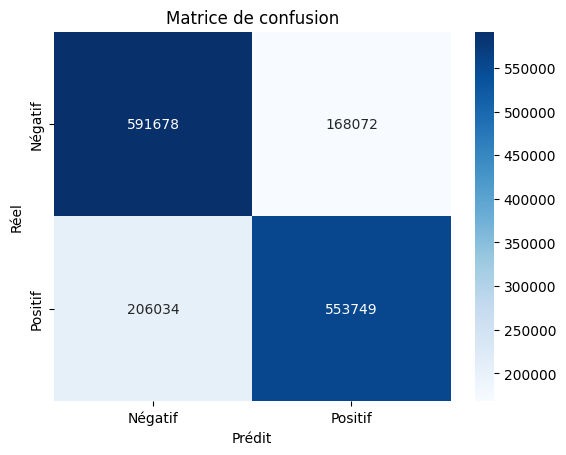

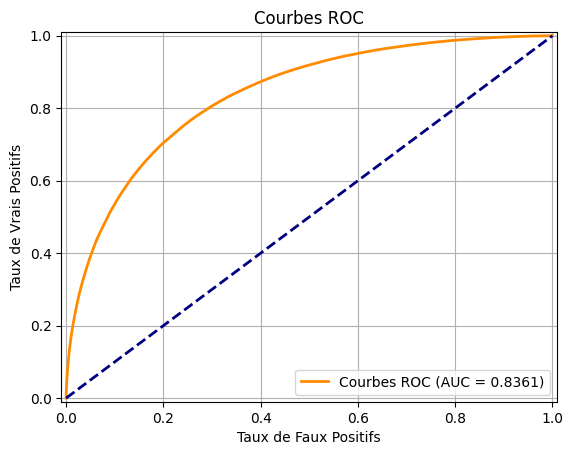

In [16]:
#Métriques
_metriques(1)

#Partie 7 : modèle TFBertModel (Hugging Face)

In [23]:
#Connexion à Google Drive
drive.mount("/content/drive/")

#On charge nos données
dataframe = pandas.read_csv("/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/TextPrepared_Dataset_TrainVal.csv", sep=";")
dataframe.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(79981, 9)

In [24]:
dataframe

,target,ids,date,flag,user,text,Bag_of_Words_Lemmatise,Bag_of_Words_Racinise,Texte_DeepLearning
0,0,2258146124,Sat Jun 20 15:27:32 PDT 2009,NO_QUERY,duckiedinkis,mourning the loss of my macbook,mourning loss macbook,mourn loss macbook,mourning the loss of my macbook
1,4,1468740719,Tue Apr 07 03:28:42 PDT 2009,NO_QUERY,yippeekid,@aplusk i'm not well just wanna say hi!!!!,aplusk well wanna say hi,aplusk well wanna say hi,aplusk i m not well just wanna say hi
2,4,1752964004,Sat May 09 23:36:48 PDT 2009,NO_QUERY,MCLOVESME,@MariahCarey hi mariah,mariahcarey hi mariah,mariahcarey hi mariah,mariahcarey hi mariah
3,0,2015019394,Wed Jun 03 03:26:59 PDT 2009,NO_QUERY,formulacyan,I can not tell you how sick and tired I am of ...,tell sick tired rain,tell sick tire rain,i can not tell you how sick and tired i am of ...
4,0,1557919262,Sun Apr 19 06:34:20 PDT 2009,NO_QUERY,davey34j,Hyperextended knee playing basketball... not s...,hyperextended knee playing basketball fun,hyperextend knee play basketbal fun,hyperextended knee playing basketball not so fun
...,...,...,...,...,...,...,...,...,...
79976,4,2190763170,Tue Jun 16 03:39:32 PDT 2009,NO_QUERY,bwfc_nozza,"can't wait to see take that, @thescript and @g...",wait see take thescript garygomusic next tuesday,wait see take thescript garygomus next tuesday,can t wait to see take that thescript and gary...
79977,4,1957542567,Fri May 29 00:49:54 PDT 2009,NO_QUERY,regineking,"@NosliwEiggam if i decide to head out after, i...",nosliweiggam decide head definitely give ring,nosliweiggam decid head definit give ring,nosliweiggam if i decide to head out after i l...
79978,0,2176472768,Mon Jun 15 03:58:19 PDT 2009,NO_QUERY,PhilDD531,Goin to class.,goin class,goin class,goin to class
79979,4,1969209277,Fri May 29 23:20:10 PDT 2009,NO_QUERY,Catohhh,@matrocksteady We are SO in a fight.,matrocksteady fight,matrocksteadi fight,matrocksteady we are so in a fight


## 7.1 : tokenization

In [25]:
#Préparation des données pour BERT


#Etape 1 : définition des données X et y
X = dataframe["Texte_DeepLearning"].tolist()
y = dataframe["target"].map({0: 0, 4: 1}).values #... on récupère "y" (qu'on remap "0"/"1", au lieu de "0"/"4")

#Etape 2 : séparation TRAIN / VALIDATION
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=23011977)

#Etape 3 : tokenisation avec BERT
tokenizerDL_BERT = BertTokenizer.from_pretrained("bert-base-uncased")
trainEncodings = tokenizerDL_BERT(X_train, truncation=True, padding=True, max_length=100, return_tensors="tf")
validationEncodings = tokenizerDL_BERT(X_val, truncation=True, padding=True, max_length=100, return_tensors="tf")

#Etape 4 : préparation des datasets TensorFlow (découpages, batch de 32...)
trainDataset = tensorflow.data.Dataset.from_tensor_slices((dict(trainEncodings), y_train)).batch(32)
validationDataset = tensorflow.data.Dataset.from_tensor_slices((dict(validationEncodings), y_val)).batch(32)

#Effacement des barres de chargement, qui corrompent le Notebook dans GitHub
clear_output(wait=True)
print("Effacement effectué pour éviter la corruption du NoteBook dans GitHub")

Effacement effectué pour éviter la corruption du NoteBook dans GitHub


## 7.2 : création du modèle

In [26]:
#Suite à un souci avec l'optimizer (incompatibilité entre TensorFlow et Keras) :
#  Plus de 4h passées à essayer de déinstaller/réinstaller d'innombrables versions de Keras/TensorFlow et TF-Keras ;
#  1 heure supplémentaire, toujours en vain, passée avec mon mentor (qui pourtant maîtrise vraiment bien)... ;
#  l'aide de ChatGPT ainsi que de Gemini Pro pour essayer de trouver une solution ;
#Décision a été prise de créer "manuellement" un optimiseur en s'appuyant sur Gemini.
#Je précise également que d'autres optimizers ont été testés : RMSprop, Adagrad ou encore Adadelta
#...avec, malheureusement, toujours le même résultat...


#Chargement du modèle pré-entraîné
modelBERT = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Pour créer l'optimiseur de transformers, il faut connaître le nombre total d'étapes d'entraînement
num_epochs = 5
# Le nombre de vos données d'entraînement, divisé par la taille de votre batch
num_train_steps_per_epoch = len(X_train)/32
num_train_steps = num_train_steps_per_epoch * num_epochs
num_warmup_steps = int(0.1 * num_train_steps) # 10% des étapes pour le "warmup" est une bonne pratique

# Création de l'optimiseur, de la fonction de perte et des métriques
optimizerModel, schedule = create_optimizer(
    init_lr=2e-5, # Votre learning rate initial
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps
)

lossModel = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metricsModel = ["accuracy"]

#Compilation du modèle avec le nouvel optimiseur
modelBERT.compile(optimizer=optimizerModel, loss=lossModel, metrics=metricsModel)


#Effacement des barres de chargement, qui corrompent le Notebook dans GitHub
clear_output(wait=True)
print("Effacement effectué pour éviter la corruption du NoteBook dans GitHub")

Effacement effectué pour éviter la corruption du NoteBook dans GitHub


In [27]:
#Pour la même raison que pour l'optimizer, le callback, lui également présente des problèmes d'incompatibilité
#Même cause, même conséquence : on va créer un callback "manuellement" en s'aidant de Gemini
class CustomModelCheckpoint(tensorflow.keras.callbacks.Callback):
    def __init__(self, model, output_dir, monitor="val_loss", verbose=1):
        super().__init__()
        self.model_to_save = model
        self.output_dir = output_dir
        self.best_val_loss = float("inf")
        self.monitor = monitor
        self.verbose = verbose

    def _implements_train_batch_hooks(self):
        return False

    def _implements_test_batch_hooks(self):
        return False

    def _implements_predict_batch_hooks(self):
        return False

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        current_val_loss = logs.get(self.monitor)

        if current_val_loss is None:
            if self.verbose:
                print(f"Warning: '{self.monitor}' not found in logs; skipping model save.")
            return

        if current_val_loss < self.best_val_loss:
            if self.verbose:
                print(f"\nEpoch {epoch + 1}: {self.monitor} improved from {self.best_val_loss:.4f} to {current_val_loss:.4f}. Saving model...")
            self.best_val_loss = current_val_loss
            try:
                self.model_to_save.save_pretrained(self.output_dir)
            except Exception as e:
                print(f"Error during model saving: {e}")
        else:
            if self.verbose:
                print(f"\nEpoch {epoch + 1}: {self.monitor} did not improve from {self.best_val_loss:.4f}.")

## 7.3 : entraînement du modèle

In [28]:
#Définition du chemin de sauvegarde pour le meilleur modèle
cheminMeilleurModel = "best_model.BERT.keras"
#Définition du chemin de sauvegarde pour le meilleur tokenizer
cheminMeilleurTokenizer = "best_model.BERT.keras_tokenizer"

#Callback pour sauvegarder le meilleur modèle (val_loss)
checkPointModel = CustomModelCheckpoint(modelBERT, cheminMeilleurModel)

#Entraînement du modèle
mlflow.set_experiment("DeepLearning")
mlflow.tensorflow.autolog()
with mlflow.start_run(run_name="BERT-TexteDL"):
    mlflow.log_param("preprocessing_type", "Texte DeepLearning - nettoyé mais non lemmatisé/racinisé")
    mlflow.set_tag("model_type", "TFBertForSequenceClassification (Hugging Face) - pretrained (bert-base-uncased)")
    history = modelBERT.fit(trainDataset, validation_data=validationDataset, epochs=5, callbacks=[checkPointModel])

    #Rechargement du meilleur modèle (meilleur Epoch)
    bestModel = TFBertForSequenceClassification.from_pretrained(cheminMeilleurModel)

    #Sauvegarde du tokenizer associé au modèle entraîné
    tokenizerDL_BERT.save_pretrained(cheminMeilleurTokenizer)

    #Sauvegarde du MEILLEUR modèle (celui rechargé) et de son tokenizer dans MLflow
    print("Sauvegarde du modèle et du tokenizer...")
    mlflow.log_artifact(cheminMeilleurModel, artifact_path="Pipeline-BERT-TexteDL")
    mlflow.log_artifact(cheminMeilleurTokenizer, artifact_path="Pipeline-BERT-TexteDL")

    #Logging manuel des métriques sur le dataset d'entraînement
    y_train_proba = bestModel.predict(trainDataset).logits
    y_train_proba_softmax = tensorflow.nn.softmax(y_train_proba, axis=1).numpy()[:, 1]
    y_train_pred = (y_train_proba_softmax >= 0.5).astype(int)
    _metriquesMLflow("train", y_train, y_train_pred, y_train_proba_softmax)

    #Logging manuel des métriques liés aux prédictions sur le dataset de validation
    y_val_proba = bestModel.predict(validationDataset).logits
    y_val_proba_softmax = tensorflow.nn.softmax(y_val_proba, axis=1).numpy()[:, 1]
    y_val_pred = (y_val_proba_softmax >= 0.5).astype(int)
    _metriquesMLflow("validation", y_val, y_val_pred, y_val_proba_softmax)

    # Sauvegarde du meilleur modèle (et de son tokenizer) dans MLflow
    # Enregistre un pipeline "proxy" simple, car joblib ne gère pas directement BERT
    print("Enregistrement du pipeline [Tokenizer + bestModel] pour MLflow...")
    pipeline_info = {"model_path": cheminMeilleurModel, "tokenizer_path": cheminMeilleurModel + "_tokenizer"}
    with open("Pipeline-BERT-TexteDL-info.pkl", "wb") as fichier:
        pickle.dump(pipeline_info, fichier)
    mlflow.log_artifact("Pipeline-BERT-TexteDL-info.pkl", artifact_path="Pipeline-BERT-TexteDL")

Epoch 1/5
1875/1875 [==============================] - ETA: 0s - loss: 0.4470 - accuracy: 0.7829
Epoch 1: val_loss improved from inf to 0.3787. Saving model...
1875/1875 [==============================] - 233s 100ms/step - loss: 0.4470 - accuracy: 0.7829 - val_loss: 0.3787 - val_accuracy: 0.8297
Epoch 2/5
1875/1875 [==============================] - ETA: 0s - loss: 0.3148 - accuracy: 0.8658
Epoch 2: val_loss did not improve from 0.3787.
1875/1875 [==============================] - 172s 92ms/step - loss: 0.3148 - accuracy: 0.8658 - val_loss: 0.4109 - val_accuracy: 0.8301
Epoch 3/5
1875/1875 [==============================] - ETA: 0s - loss: 0.2031 - accuracy: 0.9192
Epoch 3: val_loss did not improve from 0.3787.
1875/1875 [==============================] - 172s 92ms/step - loss: 0.2031 - accuracy: 0.9192 - val_loss: 0.4714 - val_accuracy: 0.8284
Epoch 4/5
1875/1875 [==============================] - ETA: 0s - loss: 0.1226 - accuracy: 0.9548
Epoch 4: val_loss did not improve from 0.3787.

Some layers from the model checkpoint at best_model.BERT.keras were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at best_model.BERT.keras.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


Sauvegarde du modèle et du tokenizer...
1875/1875 [==============================] - 66s 34ms/step
Enregistrement des métriques de la phase "train"


625/625 [==============================] - 21s 34ms/step
Enregistrement des métriques de la phase "validation"


Enregistrement du pipeline [Tokenizer + bestModel] pour MLflow...


## 7.4 : chargement du meilleur modèle et test de prédiction sur les données de test (1,5 millions de Tweets)

In [8]:
#Connexion à Google Drive
drive.mount("/content/drive/")

#On charge nos données
dataframe = pandas.read_csv("/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/TextPrepared_Dataset_Test.csv", sep=";")
dataframe.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(1519533, 9)

In [9]:
dataframe

,target,ids,date,flag,user,text,Bag_of_Words_Lemmatise,Bag_of_Words_Racinise,Texte_DeepLearning
0,4,2180525536,Mon Jun 15 10:35:20 PDT 2009,NO_QUERY,TonyMadBony,new August Burns Red song up now!,new august burn red song,new august burn red song,new august burns red song up now
1,4,2178122732,Mon Jun 15 07:13:40 PDT 2009,NO_QUERY,CheapInVegas,@smach241 Excellent tip! I've got so many cas...,smach excellent tip got many casino card could...,smach excel tip got mani casino card could dea...,smach excellent tip i ve got so many casino ca...
2,4,1678111297,Sat May 02 05:32:32 PDT 2009,NO_QUERY,Nemi72,@Morrica I did my cleaning and laundry yesterd...,morrica cleaning laundry yesterday relaxing day,morrica clean laundri yesterday relax day,morrica i did my cleaning and laundry yesterda...
3,4,2067490950,Sun Jun 07 12:26:19 PDT 2009,NO_QUERY,CrunchyNits,"@Karinaaaaaaaaaa Well, i live really close to ...",karinaaaaaaaaaa well live really close falkirk x,karinaaaaaaaaaa well live realli close falkirk x,karinaaaaaaaaaa well i live really close to fa...
4,4,2064229861,Sun Jun 07 05:38:58 PDT 2009,NO_QUERY,XxXsusan94XxX,The first thing I did when I woke up was drink...,first thing woke drink coca cola neeeded energ...,first thing woke drink coca cola neeed energi xx,the first thing i did when i woke up was drink...
...,...,...,...,...,...,...,...,...,...
1519528,0,2057760968,Sat Jun 06 13:36:41 PDT 2009,NO_QUERY,Nathan133,@Clubpenguinfan3 bye - nobody tweeting,clubpenguinfan bye nobody tweeting,clubpenguinfan bye nobodi tweet,clubpenguinfan bye nobody tweeting
1519529,4,1956124980,Thu May 28 21:14:11 PDT 2009,NO_QUERY,MelissaHeckman,"Taken for granted, completely enchanted by you.",taken granted completely enchanted,taken grant complet enchant,taken for granted completely enchanted by you
1519530,0,2059119021,Sat Jun 06 16:17:05 PDT 2009,NO_QUERY,LUVNSTYLES,@GsoHandsome I invited u brotha.. U turned me ...,gsohandsome invited u brotha u turned lol naa ...,gsohandsom invit u brotha u turn lol naa find ...,gsohandsome i invited u brotha u turned me dow...
1519531,0,2251470986,Sat Jun 20 03:36:42 PDT 2009,NO_QUERY,MonteCarlo311,FUCK I LOST HER,fuck lost,fuck lost,fuck i lost her


In [10]:
#Chargement du pipeline
#Correspond au modèle MLflow run_id : 2ab336eab25d4b21af6ac871e7ea087e
cheminBERT_Tokenizer = "///content/drive/My Drive/Colab_Notebooks/Project_7/MLflow_data/734748334327253282/e5688fb58e9c439ebef416e432a216a9/artifacts/Pipeline-BERT-TexteDL/best_model.BERT.keras_tokenizer"
cheminBERT_Model = "///content/drive/My Drive/Colab_Notebooks/Project_7/MLflow_data/734748334327253282/e5688fb58e9c439ebef416e432a216a9/artifacts/Pipeline-BERT-TexteDL/best_model.BERT.keras"

# Chargement du tokenizer (enregistré avec joblib ou Pickle)
BERT_Tokenizer = BertTokenizerFast.from_pretrained(cheminBERT_Tokenizer)

# Chargement du modèle BERT TensorFlow
BERT_Model = TFBertForSequenceClassification.from_pretrained(cheminBERT_Model)

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some layers from the model checkpoint at ///content/drive/My Drive/Colab_Notebooks/Project_7/MLflow_data/734748334327253282/e5688fb58e9c439ebef416e432a216a9/artifacts/Pipeline-BERT-TexteDL/best_model.BERT.keras were not used when initializing TFBertForSequenceClassification: ['dropout_189']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassificat

In [11]:
#Inférence sur les données de test (1,5 millions de Tweets)


#Etape 1 : définition des données X et y
X_test = dataframe["Texte_DeepLearning"].tolist()
y_test = dataframe["target"].map({0: 0, 4: 1}).values #... on récupère "y" (qu'on remap "0"/"1", au lieu de "0"/"4")

#Etape 2 : tokenisation
X_test_encoded = BERT_Tokenizer(X_test, padding=True, truncation=True, return_tensors="tf")

#Etape 3 : création d'un dataset TensorFlow batché (32)
dataset = tensorflow.data.Dataset.from_tensor_slices(dict(X_test_encoded)).batch(32)

#Etape 4 : prédictions
y_proba = BERT_Model.predict(dataset).logits[:, 1]
y_pred = tensorflow.math.argmax(y_proba, axis=1).numpy()[:, 1]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


47486/47486 [==============================] - 2359s 49ms/step


Accuracy	: 0.829797049488231

ROC AUC score	: 0.9104949901446484

Rapport de classification :
              precision    recall  f1-score   support

     Négatif       0.81      0.86      0.83    759750
     Positif       0.85      0.80      0.83    759783

    accuracy                           0.83   1519533
   macro avg       0.83      0.83      0.83   1519533
weighted avg       0.83      0.83      0.83   1519533



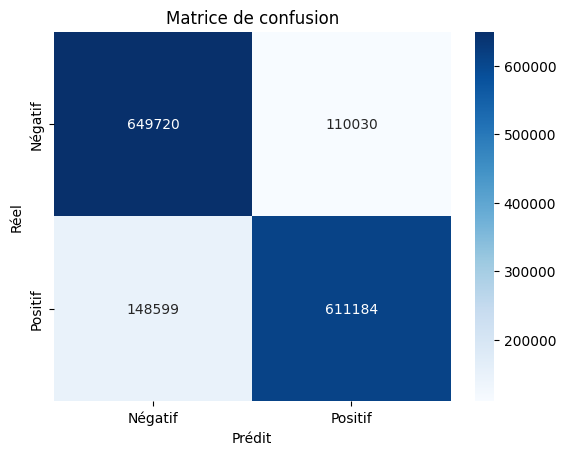

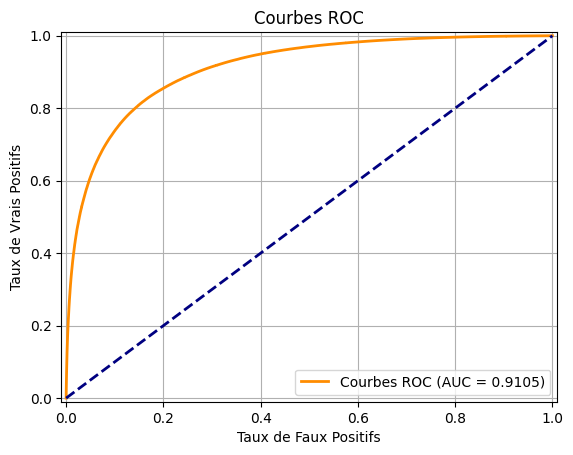

In [20]:
#Métriques
_metriques(1)

#Partie 8 : modèle USE

In [34]:
#Connexion à Google Drive
drive.mount("/content/drive/")

#On charge nos données
dataframe = pandas.read_csv("/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/TextPrepared_Dataset_TrainVal.csv", sep=";")
dataframe.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(79981, 9)

In [35]:
dataframe

,target,ids,date,flag,user,text,Bag_of_Words_Lemmatise,Bag_of_Words_Racinise,Texte_DeepLearning
0,0,2258146124,Sat Jun 20 15:27:32 PDT 2009,NO_QUERY,duckiedinkis,mourning the loss of my macbook,mourning loss macbook,mourn loss macbook,mourning the loss of my macbook
1,4,1468740719,Tue Apr 07 03:28:42 PDT 2009,NO_QUERY,yippeekid,@aplusk i'm not well just wanna say hi!!!!,aplusk well wanna say hi,aplusk well wanna say hi,aplusk i m not well just wanna say hi
2,4,1752964004,Sat May 09 23:36:48 PDT 2009,NO_QUERY,MCLOVESME,@MariahCarey hi mariah,mariahcarey hi mariah,mariahcarey hi mariah,mariahcarey hi mariah
3,0,2015019394,Wed Jun 03 03:26:59 PDT 2009,NO_QUERY,formulacyan,I can not tell you how sick and tired I am of ...,tell sick tired rain,tell sick tire rain,i can not tell you how sick and tired i am of ...
4,0,1557919262,Sun Apr 19 06:34:20 PDT 2009,NO_QUERY,davey34j,Hyperextended knee playing basketball... not s...,hyperextended knee playing basketball fun,hyperextend knee play basketbal fun,hyperextended knee playing basketball not so fun
...,...,...,...,...,...,...,...,...,...
79976,4,2190763170,Tue Jun 16 03:39:32 PDT 2009,NO_QUERY,bwfc_nozza,"can't wait to see take that, @thescript and @g...",wait see take thescript garygomusic next tuesday,wait see take thescript garygomus next tuesday,can t wait to see take that thescript and gary...
79977,4,1957542567,Fri May 29 00:49:54 PDT 2009,NO_QUERY,regineking,"@NosliwEiggam if i decide to head out after, i...",nosliweiggam decide head definitely give ring,nosliweiggam decid head definit give ring,nosliweiggam if i decide to head out after i l...
79978,0,2176472768,Mon Jun 15 03:58:19 PDT 2009,NO_QUERY,PhilDD531,Goin to class.,goin class,goin class,goin to class
79979,4,1969209277,Fri May 29 23:20:10 PDT 2009,NO_QUERY,Catohhh,@matrocksteady We are SO in a fight.,matrocksteady fight,matrocksteadi fight,matrocksteady we are so in a fight


## 8.1 : encodage

In [36]:
#Préparation des données pour USE


#Etape 1 : définition des données X et y
X = dataframe["Texte_DeepLearning"].tolist()
y = dataframe["target"].map({0: 0, 4: 1}).values #... on récupère "y" (qu'on remap "0"/"1", au lieu de "0"/"4")

#Etape 2 : séparation TRAIN / VALIDATION
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=23011977)

#Etape 3 : chargement de l'embedding USE
encoderUSE = tensorflow_hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

#Etape 4 : encodage des textes
X_train_embeddings = encoderUSE(X_train).numpy()
X_val_embeddings = encoderUSE(X_val).numpy()

#Etape 5 : préparation des datasets TensorFlow (découpages, batch de 32...)
trainDataset = tensorflow.data.Dataset.from_tensor_slices((X_train_embeddings, y_train)).batch(32)
validationDataset = tensorflow.data.Dataset.from_tensor_slices((X_val_embeddings, y_val)).batch(32)

## 8.2 : création du modèle

In [37]:
#Création d’un modèle basé sur USE
modelUSE = Sequential(name="USE_Classifier")
modelUSE.add(tensorflow.keras.Input(shape=(512,), name="USE_Input"))  #Vecteurs 512 dimensions
modelUSE.add(Dropout(0.3))
modelUSE.add(Dense(256, activation="relu"))
modelUSE.add(Dropout(0.3))
modelUSE.add(Dense(1, activation="sigmoid"))

#Définition de l’optimiseur, de la fonction de perte et des métriques
optimizerModel = Adam(learning_rate=2e-5)
lossModel = tensorflow.keras.losses.BinaryCrossentropy()
metricsModel = ["accuracy"]

#Compilation du modèle avec le nouvel optimiseur
modelUSE.compile(optimizer=optimizerModel, loss=lossModel, metrics=metricsModel)

## 8.3 : entraînement du modèle

In [42]:
#Définition du chemin de sauvegarde pour le meilleur modèle
cheminMeilleurModel = "best_model.USE.keras"

#Callback pour sauvegarder le meilleur modèle (val_loss)
checkPointModel = ModelCheckpoint(filepath=cheminMeilleurModel, monitor="val_loss", save_best_only=True, mode="min", verbose=1)
earlyStopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5)
listCallbacks = [checkPointModel, earlyStopping]

#Entraînement du modèle
mlflow.set_experiment("DeepLearning")
mlflow.tensorflow.autolog()
with mlflow.start_run(run_name="USE-TexteDL"):
    mlflow.log_param("preprocessing_type", "Texte DeepLearning - nettoyé mais non lemmatisé/racinisé")
    mlflow.set_tag("model_type", "Universal Sentence Encoder (USE) - pretrained")
    history = modelUSE.fit(trainDataset, validation_data=validationDataset, epochs=200, callbacks=listCallbacks)

    #Rechargement du meilleur modèle (meilleur Epoch)
    bestModel = tensorflow.keras.models.load_model(cheminMeilleurModel)

    #Sauvegarde du MEILLEUR modèle dans MLflow
    print("Sauvegarde du modèle...")
    mlflow.log_artifact(cheminMeilleurModel, artifact_path="Pipeline-USE-TexteDL")

    #Logging manuel des métriques sur le dataset d'entraînement
    y_train_proba = bestModel.predict(trainDataset).flatten()
    y_train_pred = (y_train_proba >= 0.5).astype(int)
    _metriquesMLflow("train", y_train, y_train_pred, y_train_proba)

    #Logging manuel des métriques liés aux prédictions sur le dataset de validation
    y_val_proba = bestModel.predict(validationDataset).flatten()
    y_val_pred = (y_val_proba >= 0.5).astype(int)
    _metriquesMLflow("validation", y_val, y_val_pred, y_val_proba)

    # Sauvegarde du "pipeline" proxy (comme pas de tokenizer, juste l'encoder)
    print("Enregistrement du pipeline [USE Encoder + bestModel] pour MLflow...")
    pipeline_info = {"model_path": cheminMeilleurModel, "encoder_name": "https://tfhub.dev/google/universal-sentence-encoder/4"}
    with open("Pipeline-USE-TexteDL-info.pkl", "wb") as fichier:
        pickle.dump(pipeline_info, fichier)
    mlflow.log_artifact("Pipeline-USE-TexteDL-info.pkl", artifact_path="Pipeline-USE-TexteDL")

Epoch 1/200
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7894 - loss: 0.4482
Epoch 1: val_loss improved from inf to 0.44543, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7894 - loss: 0.4482 - val_accuracy: 0.7903 - val_loss: 0.4454
Epoch 2/200
1857/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7898 - loss: 0.4458
Epoch 2: val_loss improved from 0.44543 to 0.44528, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7898 - loss: 0.4459 - val_accuracy: 0.7908 - val_loss: 0.4453
Epoch 3/200
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7884 - loss: 0.4476
Epoch 3: val_loss improved from 0.44528 to 0.44514, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7884 - loss: 0.4476 - val_accuracy: 0.7914 - val_loss: 0.4451
Epoch 4/200
1856/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7891 - loss: 0.4477
Epoch 4: val_loss improved from 0.44514 to 0.44499, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7891 - loss: 0.4477 - val_accuracy: 0.7908 - val_loss: 0.4450
Epoch 5/200
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7910 - loss: 0.4454
Epoch 5: val_loss improved from 0.44499 to 0.44488, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7910 - loss: 0.4454 - val_accuracy: 0.7909 - val_loss: 0.4449
Epoch 6/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7902 - loss: 0.4438
Epoch 6: val_loss improved from 0.44488 to 0.44464, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7902 - loss: 0.4438 - val_accuracy: 0.7909 - val_loss: 0.4446
Epoch 7/200
1860/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7913 - loss: 0.4448
Epoch 7: val_loss improved from 0.44464 to 0.44450, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7913 - loss: 0.4448 - val_accuracy: 0.7906 - val_loss: 0.4445
Epoch 8/200
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7917 - loss: 0.4449
Epoch 8: val_loss improved from 0.44450 to 0.44430, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7917 - loss: 0.4449 - val_accuracy: 0.7909 - val_loss: 0.4443
Epoch 9/200
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7896 - loss: 0.4425
Epoch 9: val_loss improved from 0.44430 to 0.44401, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7896 - loss: 0.4426 - val_accuracy: 0.7907 - val_loss: 0.4440
Epoch 10/200
1856/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7906 - loss: 0.4437
Epoch 10: val_loss improved from 0.44401 to 0.44392, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7906 - loss: 0.4438 - val_accuracy: 0.7912 - val_loss: 0.4439
Epoch 11/200
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7907 - loss: 0.4431
Epoch 11: val_loss improved from 0.44392 to 0.44376, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7907 - loss: 0.4431 - val_accuracy: 0.7915 - val_loss: 0.4438
Epoch 12/200
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7928 - loss: 0.4429
Epoch 12: val_loss improved from 0.44376 to 0.44367, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7928 - loss: 0.4429 - val_accuracy: 0.7913 - val_loss: 0.4437
Epoch 13/200
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7925 - loss: 0.4417
Epoch 13: val_loss improved from 0.44367 to 0.44339, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7925 - loss: 0.4417 - val_accuracy: 0.7914 - val_loss: 0.4434
Epoch 14/200
1857/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7902 - loss: 0.4433
Epoch 14: val_loss improved from 0.44339 to 0.44326, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7902 - loss: 0.4433 - val_accuracy: 0.7918 - val_loss: 0.4433
Epoch 15/200
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7932 - loss: 0.4418
Epoch 15: val_loss improved from 0.44326 to 0.44312, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7932 - loss: 0.4419 - val_accuracy: 0.7912 - val_loss: 0.4431
Epoch 16/200
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7918 - loss: 0.4423
Epoch 16: val_loss improved from 0.44312 to 0.44300, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7918 - loss: 0.4423 - val_accuracy: 0.7916 - val_loss: 0.4430
Epoch 17/200
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7943 - loss: 0.4409
Epoch 17: val_loss improved from 0.44300 to 0.44285, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7943 - loss: 0.4409 - val_accuracy: 0.7914 - val_loss: 0.4429
Epoch 18/200
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7934 - loss: 0.4420
Epoch 18: val_loss improved from 0.44285 to 0.44276, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7934 - loss: 0.4420 - val_accuracy: 0.7914 - val_loss: 0.4428
Epoch 19/200
1860/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7939 - loss: 0.4419
Epoch 19: val_loss improved from 0.44276 to 0.44267, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7939 - loss: 0.4419 - val_accuracy: 0.7920 - val_loss: 0.4427
Epoch 20/200
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7919 - loss: 0.4412
Epoch 20: val_loss improved from 0.44267 to 0.44248, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7919 - loss: 0.4412 - val_accuracy: 0.7918 - val_loss: 0.4425
Epoch 21/200
1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7961 - loss: 0.4391
Epoch 21: val_loss improved from 0.44248 to 0.44235, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7961 - loss: 0.4392 - val_accuracy: 0.7919 - val_loss: 0.4424
Epoch 22/200
1855/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7939 - loss: 0.4395
Epoch 22: val_loss improved from 0.44235 to 0.44212, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7939 - loss: 0.4395 - val_accuracy: 0.7919 - val_loss: 0.4421
Epoch 23/200
1856/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7927 - loss: 0.4394
Epoch 23: val_loss improved from 0.44212 to 0.44202, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7927 - loss: 0.4394 - val_accuracy: 0.7919 - val_loss: 0.4420
Epoch 24/200
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7933 - loss: 0.4392
Epoch 24: val_loss improved from 0.44202 to 0.44190, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7933 - loss: 0.4392 - val_accuracy: 0.7924 - val_loss: 0.4419
Epoch 25/200
1860/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7953 - loss: 0.4383
Epoch 25: val_loss improved from 0.44190 to 0.44179, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7953 - loss: 0.4383 - val_accuracy: 0.7924 - val_loss: 0.4418
Epoch 26/200
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7935 - loss: 0.4384
Epoch 26: val_loss improved from 0.44179 to 0.44166, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7935 - loss: 0.4384 - val_accuracy: 0.7925 - val_loss: 0.4417
Epoch 27/200
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7950 - loss: 0.4391
Epoch 27: val_loss improved from 0.44166 to 0.44161, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7950 - loss: 0.4392 - val_accuracy: 0.7927 - val_loss: 0.4416
Epoch 28/200
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7935 - loss: 0.4409
Epoch 28: val_loss improved from 0.44161 to 0.44145, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7935 - loss: 0.4409 - val_accuracy: 0.7927 - val_loss: 0.4415
Epoch 29/200
1859/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7976 - loss: 0.4374
Epoch 29: val_loss improved from 0.44145 to 0.44131, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7975 - loss: 0.4374 - val_accuracy: 0.7931 - val_loss: 0.4413
Epoch 30/200
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7945 - loss: 0.4374
Epoch 30: val_loss improved from 0.44131 to 0.44116, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7945 - loss: 0.4374 - val_accuracy: 0.7932 - val_loss: 0.4412
Epoch 31/200
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7950 - loss: 0.4372
Epoch 31: val_loss did not improve from 0.44116
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7950 - loss: 0.4372 - val_accuracy: 0.7941 - val_loss: 0.4412
Epoch 32/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7969 - loss: 0.4364
Epoch 32: val_loss improved from 0.44116 to 0.44092, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7969 - loss: 0.4364 - val_accuracy: 0.7935 - val_loss: 0.4409
Epoch 33/200
1856/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7966 - loss: 0.4367
Epoch 33: val_loss improved from 0.44092 to 0.44088, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7966 - loss: 0.4367 - val_accuracy: 0.7937 - val_loss: 0.4409
Epoch 34/200
1855/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7967 - loss: 0.4345
Epoch 34: val_loss improved from 0.44088 to 0.44072, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7967 - loss: 0.4345 - val_accuracy: 0.7937 - val_loss: 0.4407
Epoch 35/200
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7987 - loss: 0.4338
Epoch 35: val_loss improved from 0.44072 to 0.44066, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7987 - loss: 0.4338 - val_accuracy: 0.7937 - val_loss: 0.4407
Epoch 36/200
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7944 - loss: 0.4365
Epoch 36: val_loss improved from 0.44066 to 0.44054, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7944 - loss: 0.4365 - val_accuracy: 0.7939 - val_loss: 0.4405
Epoch 37/200
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7966 - loss: 0.4347
Epoch 37: val_loss improved from 0.44054 to 0.44042, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7966 - loss: 0.4347 - val_accuracy: 0.7935 - val_loss: 0.4404
Epoch 38/200
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7953 - loss: 0.4359
Epoch 38: val_loss did not improve from 0.44042
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7953 - loss: 0.4360 - val_accuracy: 0.7934 - val_loss: 0.4404
Epoch 39/200
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7967 - loss: 0.4343
Epoch 39: val_loss improved from 0.44042 to 0.44026, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7967 - loss: 0.4343 - val_accuracy: 0.7939 - val_loss: 0.4403
Epoch 40/200
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7968 - loss: 0.4334
Epoch 40: val_loss improved from 0.44026 to 0.44014, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7968 - loss: 0.4334 - val_accuracy: 0.7936 - val_loss: 0.4401
Epoch 41/200
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.4347
Epoch 41: val_loss improved from 0.44014 to 0.44001, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7977 - loss: 0.4347 - val_accuracy: 0.7937 - val_loss: 0.4400
Epoch 42/200
1858/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7970 - loss: 0.4346
Epoch 42: val_loss improved from 0.44001 to 0.43999, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7970 - loss: 0.4347 - val_accuracy: 0.7933 - val_loss: 0.4400
Epoch 43/200
1857/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7984 - loss: 0.4349
Epoch 43: val_loss improved from 0.43999 to 0.43994, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7984 - loss: 0.4349 - val_accuracy: 0.7934 - val_loss: 0.4399
Epoch 44/200
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7997 - loss: 0.4311
Epoch 44: val_loss improved from 0.43994 to 0.43989, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7997 - loss: 0.4311 - val_accuracy: 0.7940 - val_loss: 0.4399
Epoch 45/200
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7989 - loss: 0.4320
Epoch 45: val_loss improved from 0.43989 to 0.43965, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7989 - loss: 0.4320 - val_accuracy: 0.7939 - val_loss: 0.4397
Epoch 46/200
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7968 - loss: 0.4328
Epoch 46: val_loss improved from 0.43965 to 0.43953, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7968 - loss: 0.4328 - val_accuracy: 0.7940 - val_loss: 0.4395
Epoch 47/200
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7995 - loss: 0.4318
Epoch 47: val_loss improved from 0.43953 to 0.43944, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7995 - loss: 0.4318 - val_accuracy: 0.7937 - val_loss: 0.4394
Epoch 48/200
1855/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.4319
Epoch 48: val_loss improved from 0.43944 to 0.43931, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7977 - loss: 0.4319 - val_accuracy: 0.7938 - val_loss: 0.4393
Epoch 49/200
1855/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8011 - loss: 0.4306
Epoch 49: val_loss did not improve from 0.43931
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8010 - loss: 0.4306 - val_accuracy: 0.7935 - val_loss: 0.4394
Epoch 50/200
1857/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8011 - loss: 0.4321
Epoch 50: val_loss improved from 0.43931 to 0.43920, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8010 - loss: 0.4321 - val_accuracy: 0.7943 - val_loss: 0.4392
Epoch 51/200
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8006 - loss: 0.4310
Epoch 51: val_loss improved from 0.43920 to 0.43915, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8006 - loss: 0.4310 - val_accuracy: 0.7939 - val_loss: 0.4391
Epoch 52/200
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8022 - loss: 0.4298
Epoch 52: val_loss improved from 0.43915 to 0.43899, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8022 - loss: 0.4298 - val_accuracy: 0.7944 - val_loss: 0.4390
Epoch 53/200
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7992 - loss: 0.4299
Epoch 53: val_loss did not improve from 0.43899
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7992 - loss: 0.4299 - val_accuracy: 0.7940 - val_loss: 0.4391
Epoch 54/200
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7997 - loss: 0.4316
Epoch 54: val_loss improved from 0.43899 to 0.43888, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7997 - loss: 0.4316 - val_accuracy: 0.7942 - val_loss: 0.4389
Epoch 55/200
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7985 - loss: 0.4315
Epoch 55: val_loss improved from 0.43888 to 0.43887, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7985 - loss: 0.4315 - val_accuracy: 0.7946 - val_loss: 0.4389
Epoch 56/200
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.4300
Epoch 56: val_loss improved from 0.43887 to 0.43880, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7992 - loss: 0.4301 - val_accuracy: 0.7946 - val_loss: 0.4388
Epoch 57/200
1859/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8019 - loss: 0.4283
Epoch 57: val_loss improved from 0.43880 to 0.43872, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8019 - loss: 0.4283 - val_accuracy: 0.7944 - val_loss: 0.4387
Epoch 58/200
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8042 - loss: 0.4272
Epoch 58: val_loss improved from 0.43872 to 0.43870, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8042 - loss: 0.4273 - val_accuracy: 0.7942 - val_loss: 0.4387
Epoch 59/200
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8002 - loss: 0.4290
Epoch 59: val_loss improved from 0.43870 to 0.43859, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8002 - loss: 0.4290 - val_accuracy: 0.7946 - val_loss: 0.4386
Epoch 60/200
1860/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8013 - loss: 0.4284
Epoch 60: val_loss improved from 0.43859 to 0.43858, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8013 - loss: 0.4284 - val_accuracy: 0.7945 - val_loss: 0.4386
Epoch 61/200
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8018 - loss: 0.4277
Epoch 61: val_loss improved from 0.43858 to 0.43856, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8018 - loss: 0.4277 - val_accuracy: 0.7947 - val_loss: 0.4386
Epoch 62/200
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7999 - loss: 0.4281
Epoch 62: val_loss improved from 0.43856 to 0.43844, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7999 - loss: 0.4281 - val_accuracy: 0.7941 - val_loss: 0.4384
Epoch 63/200
1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8040 - loss: 0.4277
Epoch 63: val_loss improved from 0.43844 to 0.43843, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8040 - loss: 0.4278 - val_accuracy: 0.7949 - val_loss: 0.4384
Epoch 64/200
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8011 - loss: 0.4278
Epoch 64: val_loss improved from 0.43843 to 0.43831, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8011 - loss: 0.4278 - val_accuracy: 0.7946 - val_loss: 0.4383
Epoch 65/200
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8001 - loss: 0.4290
Epoch 65: val_loss improved from 0.43831 to 0.43830, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8001 - loss: 0.4290 - val_accuracy: 0.7949 - val_loss: 0.4383
Epoch 66/200
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8032 - loss: 0.4281
Epoch 66: val_loss improved from 0.43830 to 0.43822, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8032 - loss: 0.4281 - val_accuracy: 0.7950 - val_loss: 0.4382
Epoch 67/200
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8013 - loss: 0.4271
Epoch 67: val_loss improved from 0.43822 to 0.43819, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8013 - loss: 0.4271 - val_accuracy: 0.7948 - val_loss: 0.4382
Epoch 68/200
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8009 - loss: 0.4264
Epoch 68: val_loss improved from 0.43819 to 0.43808, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8009 - loss: 0.4264 - val_accuracy: 0.7954 - val_loss: 0.4381
Epoch 69/200
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8049 - loss: 0.4246
Epoch 69: val_loss did not improve from 0.43808
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8049 - loss: 0.4247 - val_accuracy: 0.7945 - val_loss: 0.4382
Epoch 70/200
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8024 - loss: 0.4254
Epoch 70: val_loss did not improve from 0.43808
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8024 - loss: 0.4254 - val_accuracy: 0.7944 - val_loss: 0.4381
Epoch 71/200
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8035 - loss: 0.4243
Epoch 71: val_loss improved from 0.43808 to 0.43800, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8035 - loss: 0.4243 - val_accuracy: 0.7947 - val_loss: 0.4380
Epoch 72/200
1859/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8053 - loss: 0.4251
Epoch 72: val_loss did not improve from 0.43800
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8053 - loss: 0.4251 - val_accuracy: 0.7947 - val_loss: 0.4381
Epoch 73/200
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8030 - loss: 0.4261
Epoch 73: val_loss did not improve from 0.43800
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8030 - loss: 0.4261 - val_accuracy: 0.7947 - val_loss: 0.4381
Epoch 74/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8023 - loss: 0.4275
Epoch 74: val_loss did not improve from 0.43800
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8023 - loss: 0.4275 - val_accuracy: 0.7950 - val_loss: 0.4380
Epoch 75/200
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8036 - loss: 0.4240
Epoch 75: val_loss i

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8036 - loss: 0.4240 - val_accuracy: 0.7953 - val_loss: 0.4380
Epoch 76/200
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8007 - loss: 0.4269
Epoch 76: val_loss did not improve from 0.43798
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8007 - loss: 0.4269 - val_accuracy: 0.7954 - val_loss: 0.4380
Epoch 77/200
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8036 - loss: 0.4254
Epoch 77: val_loss did not improve from 0.43798
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8036 - loss: 0.4254 - val_accuracy: 0.7946 - val_loss: 0.4380
Epoch 78/200
1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8040 - loss: 0.4228
Epoch 78: val_loss improved from 0.43798 to 0.43783, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8040 - loss: 0.4228 - val_accuracy: 0.7944 - val_loss: 0.4378
Epoch 79/200
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8056 - loss: 0.4217
Epoch 79: val_loss did not improve from 0.43783
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8056 - loss: 0.4217 - val_accuracy: 0.7945 - val_loss: 0.4379
Epoch 80/200
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8042 - loss: 0.4262
Epoch 80: val_loss improved from 0.43783 to 0.43775, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8042 - loss: 0.4262 - val_accuracy: 0.7945 - val_loss: 0.4377
Epoch 81/200
1859/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8046 - loss: 0.4256
Epoch 81: val_loss improved from 0.43775 to 0.43764, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8046 - loss: 0.4256 - val_accuracy: 0.7950 - val_loss: 0.4376
Epoch 82/200
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8050 - loss: 0.4234
Epoch 82: val_loss did not improve from 0.43764
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8050 - loss: 0.4234 - val_accuracy: 0.7948 - val_loss: 0.4377
Epoch 83/200
1858/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8040 - loss: 0.4221
Epoch 83: val_loss did not improve from 0.43764
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8040 - loss: 0.4221 - val_accuracy: 0.7951 - val_loss: 0.4377
Epoch 84/200
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8036 - loss: 0.4225
Epoch 84: val_loss improved from 0.43764 to 0.43763, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8036 - loss: 0.4225 - val_accuracy: 0.7953 - val_loss: 0.4376
Epoch 85/200
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8063 - loss: 0.4223
Epoch 85: val_loss did not improve from 0.43763
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8063 - loss: 0.4223 - val_accuracy: 0.7951 - val_loss: 0.4377
Epoch 86/200
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8048 - loss: 0.4241
Epoch 86: val_loss improved from 0.43763 to 0.43759, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8048 - loss: 0.4241 - val_accuracy: 0.7953 - val_loss: 0.4376
Epoch 87/200
1859/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8054 - loss: 0.4207
Epoch 87: val_loss did not improve from 0.43759
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8054 - loss: 0.4207 - val_accuracy: 0.7953 - val_loss: 0.4377
Epoch 88/200
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8057 - loss: 0.4226
Epoch 88: val_loss did not improve from 0.43759
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8057 - loss: 0.4226 - val_accuracy: 0.7950 - val_loss: 0.4377
Epoch 89/200
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8062 - loss: 0.4217
Epoch 89: val_loss improved from 0.43759 to 0.43752, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8062 - loss: 0.4217 - val_accuracy: 0.7948 - val_loss: 0.4375
Epoch 90/200
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8076 - loss: 0.4204
Epoch 90: val_loss improved from 0.43752 to 0.43751, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8076 - loss: 0.4204 - val_accuracy: 0.7951 - val_loss: 0.4375
Epoch 91/200
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8065 - loss: 0.4212
Epoch 91: val_loss improved from 0.43751 to 0.43751, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8065 - loss: 0.4212 - val_accuracy: 0.7949 - val_loss: 0.4375
Epoch 92/200
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8061 - loss: 0.4208
Epoch 92: val_loss improved from 0.43751 to 0.43739, saving model to best_model.USE.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8061 - loss: 0.4208 - val_accuracy: 0.7948 - val_loss: 0.4374
Epoch 93/200
1860/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8063 - loss: 0.4195
Epoch 93: val_loss did not improve from 0.43739
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8063 - loss: 0.4195 - val_accuracy: 0.7945 - val_loss: 0.4374
Epoch 94/200
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8054 - loss: 0.4204
Epoch 94: val_loss did not improve from 0.43739
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8054 - loss: 0.4204 - val_accuracy: 0.7946 - val_loss: 0.4375
Epoch 95/200
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8051 - loss: 0.4192
Epoch 95: val_loss did not improve from 0.43739
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8051 - loss: 0.4192 - val_accuracy: 0.7947 - val_loss: 0.4375
Epoch 96/200
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8032 - loss: 0.4201
Epoch 96: val_loss d

2025/07/31 12:38:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/31 12:38:13 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpbmwa5l3b/model, flavor: tensorflow). Fall back to return ['tensorflow==2.18.0', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 


Sauvegarde du modèle...
  40/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step    

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Enregistrement des métriques de la phase "train"


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Enregistrement des métriques de la phase "validation"


Enregistrement du pipeline [USE Encoder + bestModel] pour MLflow...


## 8.4 : chargement du meilleur modèle et test de prédiction sur les données de test (1,5 millions de Tweets)

In [9]:
#Connexion à Google Drive
drive.mount("/content/drive/")

#On charge nos données
dataframe = pandas.read_csv("/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/TextPrepared_Dataset_Test.csv", sep=";")
dataframe.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(1519533, 9)

In [10]:
dataframe

,target,ids,date,flag,user,text,Bag_of_Words_Lemmatise,Bag_of_Words_Racinise,Texte_DeepLearning
0,4,2180525536,Mon Jun 15 10:35:20 PDT 2009,NO_QUERY,TonyMadBony,new August Burns Red song up now!,new august burn red song,new august burn red song,new august burns red song up now
1,4,2178122732,Mon Jun 15 07:13:40 PDT 2009,NO_QUERY,CheapInVegas,@smach241 Excellent tip! I've got so many cas...,smach excellent tip got many casino card could...,smach excel tip got mani casino card could dea...,smach excellent tip i ve got so many casino ca...
2,4,1678111297,Sat May 02 05:32:32 PDT 2009,NO_QUERY,Nemi72,@Morrica I did my cleaning and laundry yesterd...,morrica cleaning laundry yesterday relaxing day,morrica clean laundri yesterday relax day,morrica i did my cleaning and laundry yesterda...
3,4,2067490950,Sun Jun 07 12:26:19 PDT 2009,NO_QUERY,CrunchyNits,"@Karinaaaaaaaaaa Well, i live really close to ...",karinaaaaaaaaaa well live really close falkirk x,karinaaaaaaaaaa well live realli close falkirk x,karinaaaaaaaaaa well i live really close to fa...
4,4,2064229861,Sun Jun 07 05:38:58 PDT 2009,NO_QUERY,XxXsusan94XxX,The first thing I did when I woke up was drink...,first thing woke drink coca cola neeeded energ...,first thing woke drink coca cola neeed energi xx,the first thing i did when i woke up was drink...
...,...,...,...,...,...,...,...,...,...
1519528,0,2057760968,Sat Jun 06 13:36:41 PDT 2009,NO_QUERY,Nathan133,@Clubpenguinfan3 bye - nobody tweeting,clubpenguinfan bye nobody tweeting,clubpenguinfan bye nobodi tweet,clubpenguinfan bye nobody tweeting
1519529,4,1956124980,Thu May 28 21:14:11 PDT 2009,NO_QUERY,MelissaHeckman,"Taken for granted, completely enchanted by you.",taken granted completely enchanted,taken grant complet enchant,taken for granted completely enchanted by you
1519530,0,2059119021,Sat Jun 06 16:17:05 PDT 2009,NO_QUERY,LUVNSTYLES,@GsoHandsome I invited u brotha.. U turned me ...,gsohandsome invited u brotha u turned lol naa ...,gsohandsom invit u brotha u turn lol naa find ...,gsohandsome i invited u brotha u turned me dow...
1519531,0,2251470986,Sat Jun 20 03:36:42 PDT 2009,NO_QUERY,MonteCarlo311,FUCK I LOST HER,fuck lost,fuck lost,fuck i lost her


In [11]:
#Chargement du pipeline
#Correspond au modèle MLflow run_id : 22f5f81366d442e385c4124d22cb2d7e
cheminUSE_Model = "///content/drive/My Drive/Colab_Notebooks/Project_7/MLflow_data/734748334327253282/22f5f81366d442e385c4124d22cb2d7e/artifacts/Pipeline-USE-TexteDL/best_model.USE.keras"

#Chargement de l'encodeur USE depuis TensorFlow Hub
USE_Encoder = tensorflow_hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

#Chargement du modèle entraîné
USE_Model = tensorflow.keras.models.load_model(cheminUSE_Model)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [14]:
#Inférence sur les données de test (1,5 millions de Tweets)


#Etape 1 : définition des données X et y
X_test = dataframe["Texte_DeepLearning"].tolist()
y_test = dataframe["target"].map({0: 0, 4: 1}).values #... on récupère "y" (qu'on remap "0"/"1", au lieu de "0"/"4")

#Etape 2 : transforme chaque tweet en chaine de caractères, en le découpant en batches de 32, et en l'encodant, batch par batch (plutôt que de tout encoder en 1x... Ce qui provoque le "Famous OOM")
testDataset = (tensorflow.data.Dataset.from_tensor_slices(X_test).batch(32).map(lambda x: USE_Encoder(x), num_parallel_calls=tensorflow.data.AUTOTUNE))

#Etape 3 : prédictions
y_proba = USE_Model.predict(testDataset).flatten()

#Etape 4 : conversion en classes binaires (0 ou 1)
y_pred = (y_proba >= 0.5).astype(int)

47486/47486 ━━━━━━━━━━━━━━━━━━━━ 192s 4ms/step


Accuracy	: 0.7927896268129748

ROC AUC score	: 0.8761731517947393

Rapport de classification :
              precision    recall  f1-score   support

     Négatif       0.78      0.81      0.80    759750
     Positif       0.80      0.78      0.79    759783

    accuracy                           0.79   1519533
   macro avg       0.79      0.79      0.79   1519533
weighted avg       0.79      0.79      0.79   1519533



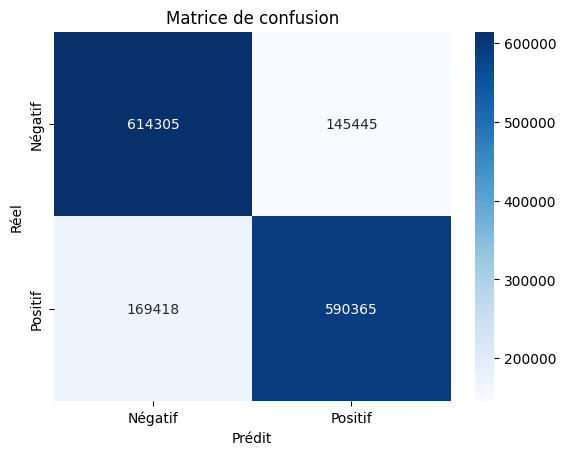

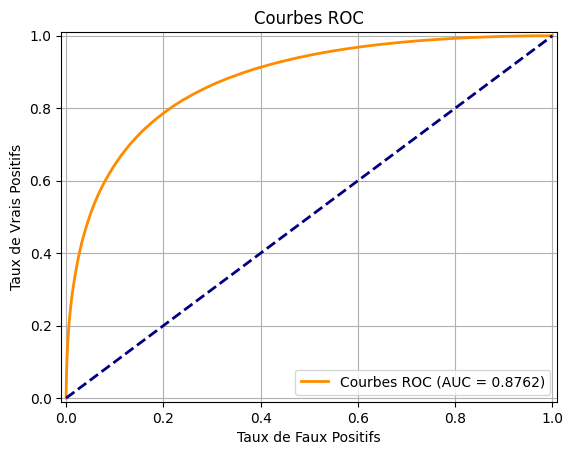

In [15]:
#Métriques
_metriques(1)

#Partie 9 : modèle SBERT

In [10]:
#Connexion à Google Drive
drive.mount("/content/drive/")

#On charge nos données
dataframe = pandas.read_csv("/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/TextPrepared_Dataset_TrainVal.csv", sep=";")
dataframe.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(79981, 9)

In [11]:
dataframe

,target,ids,date,flag,user,text,Bag_of_Words_Lemmatise,Bag_of_Words_Racinise,Texte_DeepLearning
0,0,2258146124,Sat Jun 20 15:27:32 PDT 2009,NO_QUERY,duckiedinkis,mourning the loss of my macbook,mourning loss macbook,mourn loss macbook,mourning the loss of my macbook
1,4,1468740719,Tue Apr 07 03:28:42 PDT 2009,NO_QUERY,yippeekid,@aplusk i'm not well just wanna say hi!!!!,aplusk well wanna say hi,aplusk well wanna say hi,aplusk i m not well just wanna say hi
2,4,1752964004,Sat May 09 23:36:48 PDT 2009,NO_QUERY,MCLOVESME,@MariahCarey hi mariah,mariahcarey hi mariah,mariahcarey hi mariah,mariahcarey hi mariah
3,0,2015019394,Wed Jun 03 03:26:59 PDT 2009,NO_QUERY,formulacyan,I can not tell you how sick and tired I am of ...,tell sick tired rain,tell sick tire rain,i can not tell you how sick and tired i am of ...
4,0,1557919262,Sun Apr 19 06:34:20 PDT 2009,NO_QUERY,davey34j,Hyperextended knee playing basketball... not s...,hyperextended knee playing basketball fun,hyperextend knee play basketbal fun,hyperextended knee playing basketball not so fun
...,...,...,...,...,...,...,...,...,...
79976,4,2190763170,Tue Jun 16 03:39:32 PDT 2009,NO_QUERY,bwfc_nozza,"can't wait to see take that, @thescript and @g...",wait see take thescript garygomusic next tuesday,wait see take thescript garygomus next tuesday,can t wait to see take that thescript and gary...
79977,4,1957542567,Fri May 29 00:49:54 PDT 2009,NO_QUERY,regineking,"@NosliwEiggam if i decide to head out after, i...",nosliweiggam decide head definitely give ring,nosliweiggam decid head definit give ring,nosliweiggam if i decide to head out after i l...
79978,0,2176472768,Mon Jun 15 03:58:19 PDT 2009,NO_QUERY,PhilDD531,Goin to class.,goin class,goin class,goin to class
79979,4,1969209277,Fri May 29 23:20:10 PDT 2009,NO_QUERY,Catohhh,@matrocksteady We are SO in a fight.,matrocksteady fight,matrocksteadi fight,matrocksteady we are so in a fight


## 9.1 : tokenization

In [12]:
#Préparation des données pour SBERT


#Etape 1 : définition des données X et y
X = dataframe["Texte_DeepLearning"].tolist()
y = dataframe["target"].map({0: 0, 4: 1}).values #...on récupère "y" (qu'on remap "0"/"1", au lieu de "0"/"4")

#Etape 2 : séparation TRAIN / VALIDATION
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=23011977)

#Etape 3 : chargement du modèle SBERT (all-mpnet-base-v2)
encoderSBERT = SentenceTransformer("all-mpnet-base-v2")

#Etape 4 : encodage simple des datasets (tout d’un coup, sans batching particulier)
trainEncodings = encoderSBERT.encode(X_train, convert_to_tensor=False)
validationEncodings = encoderSBERT.encode(X_val, convert_to_tensor=False)

#Etape 5 : conversion en TensorFlow
trainEncodings_tf = tensorflow.convert_to_tensor(trainEncodings)
validationEncodings_tf = tensorflow.convert_to_tensor(validationEncodings)

#Etape 6 : préparation des datasets TensorFlow (découpages, batch de 32...)
trainDataset = tensorflow.data.Dataset.from_tensor_slices((trainEncodings_tf, y_train)).batch(32)
validationDataset = tensorflow.data.Dataset.from_tensor_slices((validationEncodings_tf, y_val)).batch(32)

#Effacement des barres de chargement, qui corrompent le Notebook dans GitHub
clear_output(wait=True)
print("Effacement effectué pour éviter la corruption du NoteBook dans GitHub")

Effacement effectué pour éviter la corruption du NoteBook dans GitHub


## 9.2 : création du modèle

In [13]:
#Création d’un modèle basé sur SBERT
modelSBERT = Sequential([
    Dense(128, activation="relu", input_shape=(768,)), #Dimension des embeddings SBERT (all-mpnet-base-v2) : 768
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

#Définition de l’optimiseur, de la fonction de perte et des métriques
optimizerModel = Adam(learning_rate=2e-5)
lossModel = tensorflow.keras.losses.BinaryCrossentropy()
metricsModel = ["accuracy"]

#Compilation du modèle
modelSBERT.compile(optimizer=optimizerModel, loss=lossModel, metrics=metricsModel)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 9.3 : entraînement du modèle

In [14]:
#Définition du chemin de sauvegarde pour le meilleur modèle
cheminMeilleurModel = "best_model.SBERT.keras"
#Pas de tokenizer à sauvegarder car SBERT encode en interne

#Callback pour sauvegarder le meilleur modèle (val_loss)
checkPointModel = ModelCheckpoint(filepath=cheminMeilleurModel, monitor="val_loss", save_best_only=True, mode="min", verbose=1)
earlyStopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5)
listCallbacks = [checkPointModel, earlyStopping]

#Entraînement du modèle
mlflow.set_experiment("DeepLearning")
mlflow.tensorflow.autolog()
with mlflow.start_run(run_name="SBERT-TexteDL"):
    mlflow.log_param("preprocessing_type", "Texte DeepLearning - nettoyé mais non lemmatisé/racinisé")
    mlflow.set_tag("model_type", "SentenceTransformer all-mpnet-base-v2 + Dense Keras")
    history = modelSBERT.fit(trainDataset, validation_data=validationDataset, epochs=200, callbacks=listCallbacks)

    #Rechargement du meilleur modèle (meilleur Epoch)
    bestModel = tensorflow.keras.models.load_model(cheminMeilleurModel)

    #Sauvegarde du meilleur modèle dans MLflow
    print("Sauvegarde du modèle dans MLflow...")
    mlflow.log_artifact(cheminMeilleurModel, artifact_path="Pipeline-SBERT-TexteDL")

    #Logging manuel des métriques sur le dataset d'entraînement
    y_train_proba = bestModel.predict(trainDataset).flatten()
    y_train_pred = (y_train_proba >= 0.5).astype(int)
    _metriquesMLflow("train", y_train, y_train_pred, y_train_proba)

    #Logging manuel des métriques liés aux prédictions sur le dataset de validation
    y_val_proba = bestModel.predict(validationDataset).flatten()
    y_val_pred = (y_val_proba >= 0.5).astype(int)
    _metriquesMLflow("validation", y_val, y_val_pred, y_val_proba)

    # Enregistre un pipeline "proxy" simple, car joblib ne gère pas directement SBERT
    pipeline_info = {"model_path": cheminMeilleurModel, "sentence_transformer_model": "all-mpnet-base-v2"}
    with open("Pipeline-SBERT-TexteDL-info.pkl", "wb") as fichier:
        pickle.dump(pipeline_info, fichier)
    mlflow.log_artifact("Pipeline-SBERT-TexteDL-info.pkl", artifact_path="Pipeline-SBERT-TexteDL")

Epoch 1/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6326 - loss: 0.6752
Epoch 1: val_loss improved from inf to 0.56975, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6326 - loss: 0.6752 - val_accuracy: 0.7589 - val_loss: 0.5697
Epoch 2/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7591 - loss: 0.5460
Epoch 2: val_loss improved from 0.56975 to 0.48628, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7591 - loss: 0.5460 - val_accuracy: 0.7723 - val_loss: 0.4863
Epoch 3/200
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7711 - loss: 0.4887
Epoch 3: val_loss improved from 0.48628 to 0.47071, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7711 - loss: 0.4887 - val_accuracy: 0.7795 - val_loss: 0.4707
Epoch 4/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7766 - loss: 0.4768
Epoch 4: val_loss improved from 0.47071 to 0.46532, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7766 - loss: 0.4768 - val_accuracy: 0.7833 - val_loss: 0.4653
Epoch 5/200
1856/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7822 - loss: 0.4701
Epoch 5: val_loss improved from 0.46532 to 0.46212, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7823 - loss: 0.4700 - val_accuracy: 0.7851 - val_loss: 0.4621
Epoch 6/200
1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7832 - loss: 0.4650
Epoch 6: val_loss improved from 0.46212 to 0.45988, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7832 - loss: 0.4650 - val_accuracy: 0.7866 - val_loss: 0.4599
Epoch 7/200
1860/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7856 - loss: 0.4628
Epoch 7: val_loss improved from 0.45988 to 0.45797, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7856 - loss: 0.4628 - val_accuracy: 0.7883 - val_loss: 0.4580
Epoch 8/200
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7872 - loss: 0.4595
Epoch 8: val_loss improved from 0.45797 to 0.45634, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7872 - loss: 0.4595 - val_accuracy: 0.7892 - val_loss: 0.4563
Epoch 9/200
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7890 - loss: 0.4577
Epoch 9: val_loss improved from 0.45634 to 0.45492, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7890 - loss: 0.4577 - val_accuracy: 0.7900 - val_loss: 0.4549
Epoch 10/200
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7908 - loss: 0.4549
Epoch 10: val_loss improved from 0.45492 to 0.45350, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7908 - loss: 0.4549 - val_accuracy: 0.7904 - val_loss: 0.4535
Epoch 11/200
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7917 - loss: 0.4533
Epoch 11: val_loss improved from 0.45350 to 0.45221, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7917 - loss: 0.4533 - val_accuracy: 0.7908 - val_loss: 0.4522
Epoch 12/200
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7932 - loss: 0.4518
Epoch 12: val_loss improved from 0.45221 to 0.45095, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7932 - loss: 0.4518 - val_accuracy: 0.7904 - val_loss: 0.4509
Epoch 13/200
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7936 - loss: 0.4480
Epoch 13: val_loss improved from 0.45095 to 0.44981, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7936 - loss: 0.4480 - val_accuracy: 0.7907 - val_loss: 0.4498
Epoch 14/200
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7944 - loss: 0.4465
Epoch 14: val_loss improved from 0.44981 to 0.44867, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7944 - loss: 0.4465 - val_accuracy: 0.7905 - val_loss: 0.4487
Epoch 15/200
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7956 - loss: 0.4451
Epoch 15: val_loss improved from 0.44867 to 0.44753, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7956 - loss: 0.4451 - val_accuracy: 0.7906 - val_loss: 0.4475
Epoch 16/200
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7953 - loss: 0.4425
Epoch 16: val_loss improved from 0.44753 to 0.44648, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7953 - loss: 0.4426 - val_accuracy: 0.7909 - val_loss: 0.4465
Epoch 17/200
1860/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7982 - loss: 0.4413
Epoch 17: val_loss improved from 0.44648 to 0.44549, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7982 - loss: 0.4413 - val_accuracy: 0.7918 - val_loss: 0.4455
Epoch 18/200
1860/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7982 - loss: 0.4392
Epoch 18: val_loss improved from 0.44549 to 0.44458, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7982 - loss: 0.4392 - val_accuracy: 0.7920 - val_loss: 0.4446
Epoch 19/200
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7977 - loss: 0.4394
Epoch 19: val_loss improved from 0.44458 to 0.44373, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7977 - loss: 0.4394 - val_accuracy: 0.7923 - val_loss: 0.4437
Epoch 20/200
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7990 - loss: 0.4362
Epoch 20: val_loss improved from 0.44373 to 0.44292, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7990 - loss: 0.4362 - val_accuracy: 0.7929 - val_loss: 0.4429
Epoch 21/200
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8005 - loss: 0.4365
Epoch 21: val_loss improved from 0.44292 to 0.44221, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8005 - loss: 0.4365 - val_accuracy: 0.7934 - val_loss: 0.4422
Epoch 22/200
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8001 - loss: 0.4341
Epoch 22: val_loss improved from 0.44221 to 0.44138, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8001 - loss: 0.4341 - val_accuracy: 0.7934 - val_loss: 0.4414
Epoch 23/200
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8009 - loss: 0.4326
Epoch 23: val_loss improved from 0.44138 to 0.44068, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8009 - loss: 0.4326 - val_accuracy: 0.7940 - val_loss: 0.4407
Epoch 24/200
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8033 - loss: 0.4321
Epoch 24: val_loss improved from 0.44068 to 0.44003, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8033 - loss: 0.4321 - val_accuracy: 0.7948 - val_loss: 0.4400
Epoch 25/200
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8036 - loss: 0.4311
Epoch 25: val_loss improved from 0.44003 to 0.43938, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8036 - loss: 0.4311 - val_accuracy: 0.7950 - val_loss: 0.4394
Epoch 26/200
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8043 - loss: 0.4293
Epoch 26: val_loss improved from 0.43938 to 0.43865, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8043 - loss: 0.4293 - val_accuracy: 0.7955 - val_loss: 0.4387
Epoch 27/200
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8051 - loss: 0.4278
Epoch 27: val_loss improved from 0.43865 to 0.43812, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8051 - loss: 0.4278 - val_accuracy: 0.7963 - val_loss: 0.4381
Epoch 28/200
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8061 - loss: 0.4285
Epoch 28: val_loss improved from 0.43812 to 0.43756, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8061 - loss: 0.4284 - val_accuracy: 0.7968 - val_loss: 0.4376
Epoch 29/200
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8058 - loss: 0.4256
Epoch 29: val_loss improved from 0.43756 to 0.43703, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8058 - loss: 0.4257 - val_accuracy: 0.7967 - val_loss: 0.4370
Epoch 30/200
1858/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8062 - loss: 0.4246
Epoch 30: val_loss improved from 0.43703 to 0.43650, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8062 - loss: 0.4246 - val_accuracy: 0.7966 - val_loss: 0.4365
Epoch 31/200
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8074 - loss: 0.4232
Epoch 31: val_loss improved from 0.43650 to 0.43610, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8074 - loss: 0.4232 - val_accuracy: 0.7970 - val_loss: 0.4361
Epoch 32/200
1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8085 - loss: 0.4216
Epoch 32: val_loss improved from 0.43610 to 0.43553, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8085 - loss: 0.4216 - val_accuracy: 0.7970 - val_loss: 0.4355
Epoch 33/200
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8086 - loss: 0.4218
Epoch 33: val_loss improved from 0.43553 to 0.43501, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8086 - loss: 0.4218 - val_accuracy: 0.7965 - val_loss: 0.4350
Epoch 34/200
1860/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8118 - loss: 0.4190
Epoch 34: val_loss improved from 0.43501 to 0.43461, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8118 - loss: 0.4190 - val_accuracy: 0.7973 - val_loss: 0.4346
Epoch 35/200
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8106 - loss: 0.4184
Epoch 35: val_loss improved from 0.43461 to 0.43416, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8106 - loss: 0.4184 - val_accuracy: 0.7972 - val_loss: 0.4342
Epoch 36/200
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8127 - loss: 0.4165
Epoch 36: val_loss improved from 0.43416 to 0.43371, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8127 - loss: 0.4165 - val_accuracy: 0.7978 - val_loss: 0.4337
Epoch 37/200
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 0.4167
Epoch 37: val_loss improved from 0.43371 to 0.43324, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8125 - loss: 0.4167 - val_accuracy: 0.7980 - val_loss: 0.4332
Epoch 38/200
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8117 - loss: 0.4155
Epoch 38: val_loss improved from 0.43324 to 0.43290, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8117 - loss: 0.4155 - val_accuracy: 0.7984 - val_loss: 0.4329
Epoch 39/200
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8147 - loss: 0.4144
Epoch 39: val_loss improved from 0.43290 to 0.43252, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8147 - loss: 0.4144 - val_accuracy: 0.7978 - val_loss: 0.4325
Epoch 40/200
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8148 - loss: 0.4125
Epoch 40: val_loss improved from 0.43252 to 0.43208, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8148 - loss: 0.4125 - val_accuracy: 0.7985 - val_loss: 0.4321
Epoch 41/200
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8161 - loss: 0.4120
Epoch 41: val_loss improved from 0.43208 to 0.43174, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8161 - loss: 0.4120 - val_accuracy: 0.7989 - val_loss: 0.4317
Epoch 42/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8156 - loss: 0.4107
Epoch 42: val_loss improved from 0.43174 to 0.43140, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8156 - loss: 0.4107 - val_accuracy: 0.7993 - val_loss: 0.4314
Epoch 43/200
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8160 - loss: 0.4107
Epoch 43: val_loss improved from 0.43140 to 0.43111, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8160 - loss: 0.4107 - val_accuracy: 0.7991 - val_loss: 0.4311
Epoch 44/200
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8159 - loss: 0.4087
Epoch 44: val_loss improved from 0.43111 to 0.43073, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8159 - loss: 0.4087 - val_accuracy: 0.7991 - val_loss: 0.4307
Epoch 45/200
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8176 - loss: 0.4079
Epoch 45: val_loss improved from 0.43073 to 0.43036, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8176 - loss: 0.4079 - val_accuracy: 0.7994 - val_loss: 0.4304
Epoch 46/200
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8179 - loss: 0.4056
Epoch 46: val_loss improved from 0.43036 to 0.43013, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8180 - loss: 0.4056 - val_accuracy: 0.7991 - val_loss: 0.4301
Epoch 47/200
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8198 - loss: 0.4050
Epoch 47: val_loss improved from 0.43013 to 0.42976, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8198 - loss: 0.4050 - val_accuracy: 0.8000 - val_loss: 0.4298
Epoch 48/200
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8186 - loss: 0.4034
Epoch 48: val_loss improved from 0.42976 to 0.42949, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8186 - loss: 0.4034 - val_accuracy: 0.7994 - val_loss: 0.4295
Epoch 49/200
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8200 - loss: 0.4030
Epoch 49: val_loss improved from 0.42949 to 0.42923, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8200 - loss: 0.4030 - val_accuracy: 0.8002 - val_loss: 0.4292
Epoch 50/200
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8210 - loss: 0.4025
Epoch 50: val_loss improved from 0.42923 to 0.42903, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8210 - loss: 0.4025 - val_accuracy: 0.8003 - val_loss: 0.4290
Epoch 51/200
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8234 - loss: 0.4005
Epoch 51: val_loss improved from 0.42903 to 0.42879, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8234 - loss: 0.4005 - val_accuracy: 0.8008 - val_loss: 0.4288
Epoch 52/200
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8221 - loss: 0.4012
Epoch 52: val_loss improved from 0.42879 to 0.42857, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8221 - loss: 0.4012 - val_accuracy: 0.8011 - val_loss: 0.4286
Epoch 53/200
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8247 - loss: 0.3995
Epoch 53: val_loss improved from 0.42857 to 0.42842, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8247 - loss: 0.3995 - val_accuracy: 0.8011 - val_loss: 0.4284
Epoch 54/200
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8243 - loss: 0.3968
Epoch 54: val_loss improved from 0.42842 to 0.42836, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8243 - loss: 0.3968 - val_accuracy: 0.8018 - val_loss: 0.4284
Epoch 55/200
1858/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8254 - loss: 0.3955
Epoch 55: val_loss improved from 0.42836 to 0.42812, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8254 - loss: 0.3955 - val_accuracy: 0.8020 - val_loss: 0.4281
Epoch 56/200
1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8264 - loss: 0.3955
Epoch 56: val_loss improved from 0.42812 to 0.42768, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8264 - loss: 0.3955 - val_accuracy: 0.8029 - val_loss: 0.4277
Epoch 57/200
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8250 - loss: 0.3946
Epoch 57: val_loss improved from 0.42768 to 0.42767, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8250 - loss: 0.3946 - val_accuracy: 0.8029 - val_loss: 0.4277
Epoch 58/200
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8275 - loss: 0.3927
Epoch 58: val_loss improved from 0.42767 to 0.42757, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8275 - loss: 0.3927 - val_accuracy: 0.8027 - val_loss: 0.4276
Epoch 59/200
1864/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8275 - loss: 0.3926
Epoch 59: val_loss improved from 0.42757 to 0.42728, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8275 - loss: 0.3926 - val_accuracy: 0.8033 - val_loss: 0.4273
Epoch 60/200
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8278 - loss: 0.3913
Epoch 60: val_loss did not improve from 0.42728
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8278 - loss: 0.3912 - val_accuracy: 0.8030 - val_loss: 0.4273
Epoch 61/200
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8303 - loss: 0.3898
Epoch 61: val_loss improved from 0.42728 to 0.42725, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8303 - loss: 0.3898 - val_accuracy: 0.8022 - val_loss: 0.4272
Epoch 62/200
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8294 - loss: 0.3872
Epoch 62: val_loss improved from 0.42725 to 0.42720, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8294 - loss: 0.3872 - val_accuracy: 0.8028 - val_loss: 0.4272
Epoch 63/200
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8296 - loss: 0.3874
Epoch 63: val_loss improved from 0.42720 to 0.42702, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8296 - loss: 0.3874 - val_accuracy: 0.8025 - val_loss: 0.4270
Epoch 64/200
1873/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8313 - loss: 0.3862
Epoch 64: val_loss improved from 0.42702 to 0.42694, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8313 - loss: 0.3862 - val_accuracy: 0.8034 - val_loss: 0.4269
Epoch 65/200
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8314 - loss: 0.3862
Epoch 65: val_loss improved from 0.42694 to 0.42683, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8314 - loss: 0.3862 - val_accuracy: 0.8038 - val_loss: 0.4268
Epoch 66/200
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8306 - loss: 0.3838
Epoch 66: val_loss improved from 0.42683 to 0.42672, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8306 - loss: 0.3838 - val_accuracy: 0.8044 - val_loss: 0.4267
Epoch 67/200
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8326 - loss: 0.3833
Epoch 67: val_loss did not improve from 0.42672
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8326 - loss: 0.3833 - val_accuracy: 0.8039 - val_loss: 0.4268
Epoch 68/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8313 - loss: 0.3829
Epoch 68: val_loss did not improve from 0.42672
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8313 - loss: 0.3829 - val_accuracy: 0.8038 - val_loss: 0.4268
Epoch 69/200
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8358 - loss: 0.3818
Epoch 69: val_loss improved from 0.42672 to 0.42663, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8358 - loss: 0.3818 - val_accuracy: 0.8036 - val_loss: 0.4266
Epoch 70/200
1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8360 - loss: 0.3795
Epoch 70: val_loss did not improve from 0.42663
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8360 - loss: 0.3795 - val_accuracy: 0.8030 - val_loss: 0.4267
Epoch 71/200
1863/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8376 - loss: 0.3771
Epoch 71: val_loss improved from 0.42663 to 0.42662, saving model to best_model.SBERT.keras


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8376 - loss: 0.3771 - val_accuracy: 0.8032 - val_loss: 0.4266
Epoch 72/200
1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8359 - loss: 0.3778
Epoch 72: val_loss did not improve from 0.42662
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8359 - loss: 0.3778 - val_accuracy: 0.8030 - val_loss: 0.4269
Epoch 73/200
1860/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8346 - loss: 0.3760
Epoch 73: val_loss did not improve from 0.42662
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8346 - loss: 0.3760 - val_accuracy: 0.8037 - val_loss: 0.4268
Epoch 74/200
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8385 - loss: 0.3743
Epoch 74: val_loss did not improve from 0.42662
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8385 - loss: 0.3743 - val_accuracy: 0.8034 - val_loss: 0.4270
Epoch 75/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8396 - loss: 0.3742
Epoch 75: val_loss d

2025/07/31 14:50:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/31 14:50:14 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp1p3y73aj/model, flavor: tensorflow). Fall back to return ['tensorflow==2.18.0', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Sauvegarde du modèle dans MLflow...
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Enregistrement des métriques de la phase "train"


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Enregistrement des métriques de la phase "validation"




## 9.4 : chargement du meilleur modèle et test de prédiction sur les données de test (1,5 millions de Tweets)

In [15]:
#Connexion à Google Drive
drive.mount("/content/drive/")

#On charge nos données
dataframe = pandas.read_csv("/content/drive/My Drive/Colab_Notebooks/Project_7/dataset/TextPrepared_Dataset_Test.csv", sep=";")
dataframe.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(1519533, 9)

In [16]:
dataframe

,target,ids,date,flag,user,text,Bag_of_Words_Lemmatise,Bag_of_Words_Racinise,Texte_DeepLearning
0,4,2180525536,Mon Jun 15 10:35:20 PDT 2009,NO_QUERY,TonyMadBony,new August Burns Red song up now!,new august burn red song,new august burn red song,new august burns red song up now
1,4,2178122732,Mon Jun 15 07:13:40 PDT 2009,NO_QUERY,CheapInVegas,@smach241 Excellent tip! I've got so many cas...,smach excellent tip got many casino card could...,smach excel tip got mani casino card could dea...,smach excellent tip i ve got so many casino ca...
2,4,1678111297,Sat May 02 05:32:32 PDT 2009,NO_QUERY,Nemi72,@Morrica I did my cleaning and laundry yesterd...,morrica cleaning laundry yesterday relaxing day,morrica clean laundri yesterday relax day,morrica i did my cleaning and laundry yesterda...
3,4,2067490950,Sun Jun 07 12:26:19 PDT 2009,NO_QUERY,CrunchyNits,"@Karinaaaaaaaaaa Well, i live really close to ...",karinaaaaaaaaaa well live really close falkirk x,karinaaaaaaaaaa well live realli close falkirk x,karinaaaaaaaaaa well i live really close to fa...
4,4,2064229861,Sun Jun 07 05:38:58 PDT 2009,NO_QUERY,XxXsusan94XxX,The first thing I did when I woke up was drink...,first thing woke drink coca cola neeeded energ...,first thing woke drink coca cola neeed energi xx,the first thing i did when i woke up was drink...
...,...,...,...,...,...,...,...,...,...
1519528,0,2057760968,Sat Jun 06 13:36:41 PDT 2009,NO_QUERY,Nathan133,@Clubpenguinfan3 bye - nobody tweeting,clubpenguinfan bye nobody tweeting,clubpenguinfan bye nobodi tweet,clubpenguinfan bye nobody tweeting
1519529,4,1956124980,Thu May 28 21:14:11 PDT 2009,NO_QUERY,MelissaHeckman,"Taken for granted, completely enchanted by you.",taken granted completely enchanted,taken grant complet enchant,taken for granted completely enchanted by you
1519530,0,2059119021,Sat Jun 06 16:17:05 PDT 2009,NO_QUERY,LUVNSTYLES,@GsoHandsome I invited u brotha.. U turned me ...,gsohandsome invited u brotha u turned lol naa ...,gsohandsom invit u brotha u turn lol naa find ...,gsohandsome i invited u brotha u turned me dow...
1519531,0,2251470986,Sat Jun 20 03:36:42 PDT 2009,NO_QUERY,MonteCarlo311,FUCK I LOST HER,fuck lost,fuck lost,fuck i lost her


In [18]:
#Chargement du pipeline
#Correspond au modèle MLflow run_id : 26f327dd8b0246e8a47cf92cd8ed0870
cheminSBERT_Model = "///content/drive/My Drive/Colab_Notebooks/Project_7/MLflow_data/734748334327253282/26f327dd8b0246e8a47cf92cd8ed0870/artifacts/Pipeline-SBERT-TexteDL/best_model.SBERT.keras"

##Chargement de l'encodeur SBERT
SBERT_Encoder = SentenceTransformer("all-mpnet-base-v2")

#Chargement du modèle Keras
SBERT_Model = tensorflow.keras.models.load_model(cheminSBERT_Model)

In [ ]:
#Inférence sur les données de test (1,5 millions de Tweets)


#Etape 1 : définition des données X et y
X_test = dataframe["Texte_DeepLearning"].tolist()
y_test = dataframe["target"].map({0: 0, 4: 1}).values #... on récupère "y" (qu'on remap "0"/"1", au lieu de "0"/"4")

#Etape 2 : transforme chaque tweet en chaine de caractères, en le découpant en batches de 32, et en l'encodant, batch par batch (plutôt que de tout encoder en 1x... Ce qui provoque le "Famous OOM")
testDataset = (tensorflow.data.Dataset.from_tensor_slices(X_test).batch(32).map(lambda x: SBERT_Encoder(x), num_parallel_calls=tensorflow.data.AUTOTUNE))

#Etape 3 : prédictions
y_proba = SBERT_Model.predict(testDataset).flatten()

#Etape 4 : conversion en classes binaires (0 ou 1)
y_pred = (y_proba >= 0.5).astype(int)

In [21]:
#Inférence sur les données de test (1,5 millions de Tweets)


#Etape 1 : définition des données X et y
X_test = dataframe["Texte_DeepLearning"].tolist()
y_test = dataframe["target"].map({0: 0, 4: 1}).values #... on récupère "y" (qu'on remap "0"/"1", au lieu de "0"/"4")

#Etape 2 : transforme chaque tweet en chaine de caractères, en le découpant en batches de 32, et en l'encodant, batch par batch (plutôt que de tout encoder en 1x... Ce qui provoque le "Famous OOM")
X_test_embeddings = []
for i in range(0, len(X_test), 32):
    batch = X_test[i:i+32]
    embeddings = SBERT_Encoder.encode(batch, convert_to_numpy=True)
    X_test_embeddings.append(embeddings)
X_test_embeddings = numpy.vstack(X_test_embeddings)

#Etape 3 : création d'un dataset TensorFlow batché (32)
testDataset = tensorflow.data.Dataset.from_tensor_slices(X_test_embeddings).batch(32)

#Etape 4 : prédictions
y_proba = SBERT_Model.predict(testDataset).flatten()

#Etape 5 : conversion en classes binaires (0 ou 1)
y_pred = (y_proba >= 0.5).astype(int)

47486/47486 ━━━━━━━━━━━━━━━━━━━━ 57s 1ms/step


Accuracy	: 0.8025959291440199

ROC AUC score	: 0.8856177597654649

Rapport de classification :
              precision    recall  f1-score   support

     Négatif       0.80      0.80      0.80    759750
     Positif       0.80      0.80      0.80    759783

    accuracy                           0.80   1519533
   macro avg       0.80      0.80      0.80   1519533
weighted avg       0.80      0.80      0.80   1519533



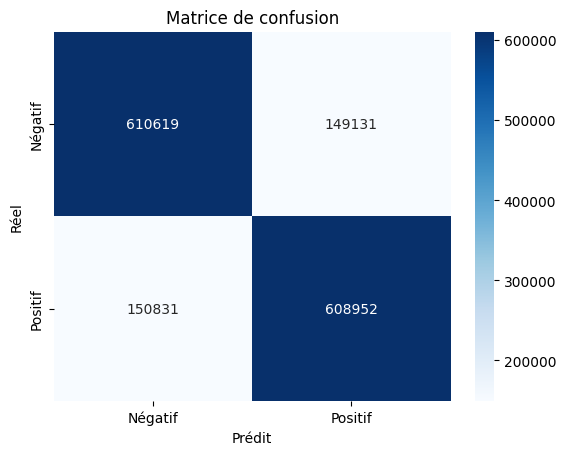

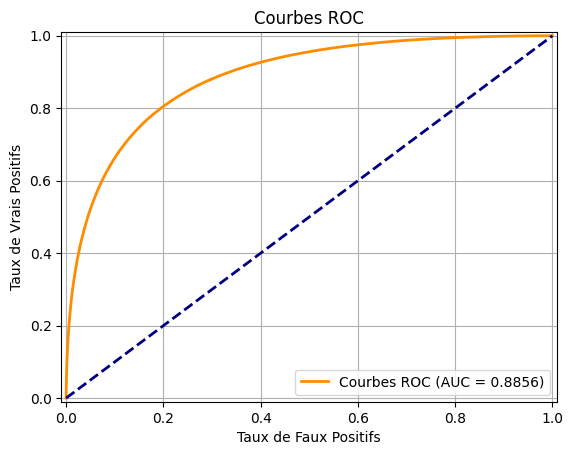

In [22]:
#Métriques
_metriques(1)